# Task 1:  Apply Exploratory Data Analysis (Univariate and Bivariate) on the dataset available above.

In [34]:
pip install plotly


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\dataset.csv")  # Replace with your actual file path


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112152 non-null  object 
 1   County                                             112152 non-null  object 
 2   City                                               112152 non-null  object 
 3   State                                              112152 non-null  object 
 4   Postal Code                                        112152 non-null  int64  
 5   Model Year                                         112152 non-null  float64
 6   Make                                               112152 non-null  object 
 7   Model                                              112152 non-null  object 
 8   Electric Vehicle Type                              112152 non-null  object 
 9 

In [37]:
df.describe(include='all')

VIN (1-10)  County     City   State    Postal Code     Model Year  \
count       112634  112634   112634  112634  112634.000000  112634.000000   
unique        7548     165      629      45            NaN            NaN   
top     5YJYGDEE9M    King  Seattle      WA            NaN            NaN   
freq           472   59000    20305  112348            NaN            NaN   
mean           NaN     NaN      NaN     NaN   98156.226850    2019.003365   
std            NaN     NaN      NaN     NaN    2648.733064       2.892364   
min            NaN     NaN      NaN     NaN    1730.000000    1997.000000   
25%            NaN     NaN      NaN     NaN   98052.000000    2017.000000   
50%            NaN     NaN      NaN     NaN   98119.000000    2020.000000   
75%            NaN     NaN      NaN     NaN   98370.000000    2022.000000   
max            NaN     NaN      NaN     NaN   99701.000000    2023.000000   

          Make    Model           Electric Vehicle Type  \
count   112634   112614                          112634   
unique      34      114                               2   
top      TESLA  MODEL 3  Battery Electric Vehicle (BEV)   
freq     52078    23135                           86044   
mean       NaN      NaN                             NaN   
std        NaN      NaN                             NaN   
min        NaN      NaN                             NaN   
25%        NaN      NaN                             NaN   
50%        NaN      NaN                             NaN   
75%        NaN      NaN                             NaN   
max        NaN      NaN                             NaN   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
count                                             112634   112634.000000   
unique                                                 3             NaN   
top              Clean Alternative Fuel Vehicle Eligible             NaN   
freq                                               58639             NaN   
mean                                                 NaN       87.812987   
std                                                  NaN      102.334216   
min                                                  NaN        0.000000   
25%                                                  NaN        0.000000   
50%                                                  NaN       32.000000   
75%                                                  NaN      208.000000   
max                                                  NaN      337.000000   

            Base MSRP  Legislative District  DOL Vehicle ID  \
count   112634.000000         112348.000000    1.126340e+05   
unique            NaN                   NaN             NaN   
top               NaN                   NaN             NaN   
freq              NaN                   NaN             NaN   
mean      1793.439681             29.805604    1.994567e+08   
std      10783.753486             14.700545    9.398427e+07   
min          0.000000              1.000000    4.777000e+03   
25%          0.000000             18.000000    1.484142e+08   
50%          0.000000             34.000000    1.923896e+08   
75%          0.000000             43.000000    2.191899e+08   
max     845000.000000             49.000000    4.792548e+08   

                   Vehicle Location  \
count                        112610   
unique                          758   
top     POINT (-122.13158 47.67858)   
freq                           2916   
mean                            NaN   
std                             NaN   
min                             NaN   
25%                             NaN   
50%                             NaN   
75%                             NaN   
max                             NaN   

                                     Electric Utility  2020 Census Tract  
count                                          112191       1.126340e+05  
unique                                             73                NaN  
top     PU

In [38]:
df.shape

(112634, 17)

# Check for Missing Values

Missing values in each column:
 Model                    20
Legislative District    286
Vehicle Location         24
Electric Utility        443
dtype: int64


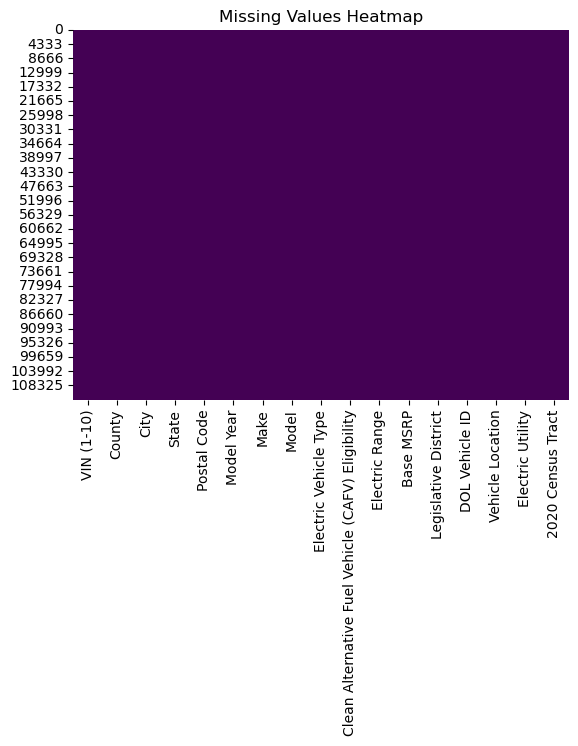

In [39]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Optionally visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# Handling Missing Values

In [40]:
# Dropping missing values (if they are sparse)
df.dropna(inplace=True)  # or df = df.dropna()

# Alternatively, fill missing values
# Fill numerical columns with mean
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Fill categorical columns with mode
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [41]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Detecting and Handling Outliers

In [42]:
# Identify outliers in numerical columns using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Loop through numerical columns to identify and handle outliers
numerical_columns = ['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
for column in numerical_columns:
    lower_bound, upper_bound = detect_outliers_iqr(df[column])
    print(f"Outliers in {column}:\n", df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    
    # Capping outliers
    df[column] = np.where(df[column] > upper_bound, upper_bound, 
                          np.where(df[column] < lower_bound, lower_bound, df[column]))


Outliers in Model Year:
         VIN (1-10)     County           City State  Postal Code  Model Year  \
14123   5YJRE11B88       King       Kirkland    WA        98033        2008   
14861   1FTZR0810Y       King        Seattle    WA        98136        2000   
23570   5YJRE11B98       King         Burien    WA        98166        2008   
23739   1FTZR0819Y       King      Shoreline    WA        98133        2000   
28584   1GCDE14HXV  Snohomish     Marysville    WA        98270        1997   
30410   5YJRE11B98       King       Issaquah    WA        98029        2008   
39799   1FTZR0812X     Skagit   Mount Vernon    WA        98274        1999   
39813   5YJRE11B08       King       Bellevue    WA        98004        2008   
43722   5YJRE11B78    Whatcom       Ferndale    WA        98248        2008   
48232   1FTZR081XY  Snohomish        Edmonds    WA        98026        2000   
49921   1FTZR0819X    Whatcom         Deming    WA        98244        1999   
51016   1FTZR0816Y       Ki

In [43]:
df.shape

(112152, 17)

In [44]:
Q1 = df['Base MSRP'].quantile(0.25)
Q3 = df['Base MSRP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Base MSRP'] < lower_bound) | (df['Base MSRP'] > upper_bound)]
outliers


Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []

# Univariate Analysis

*#For Numerical Columns*

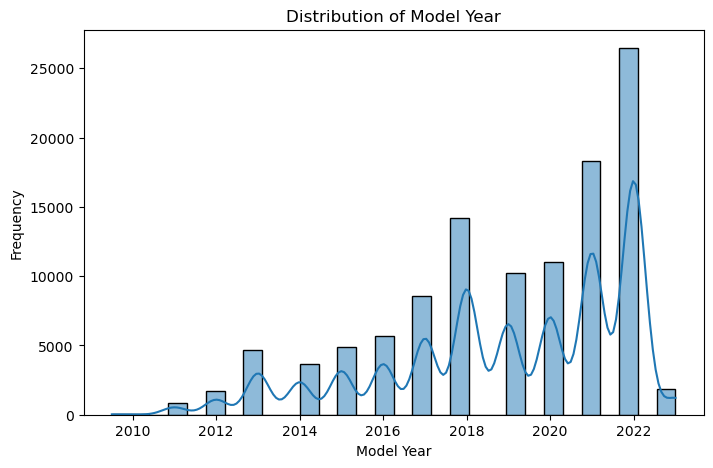

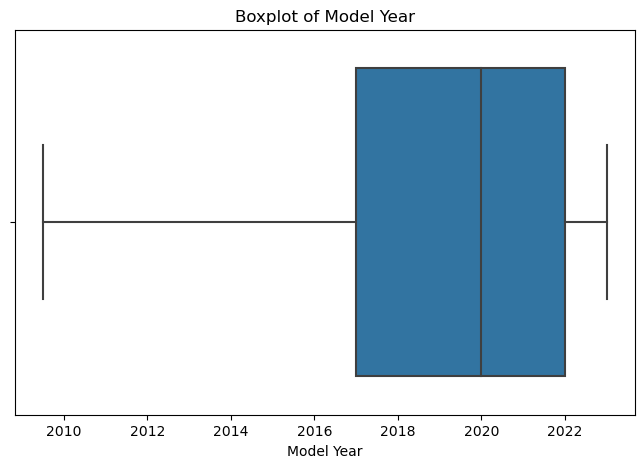

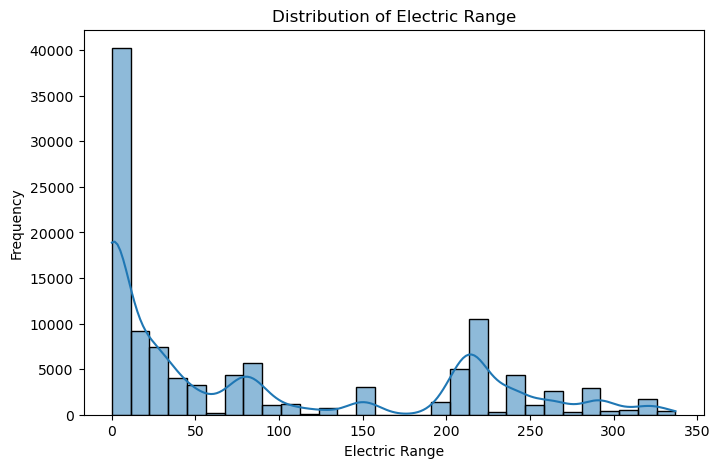

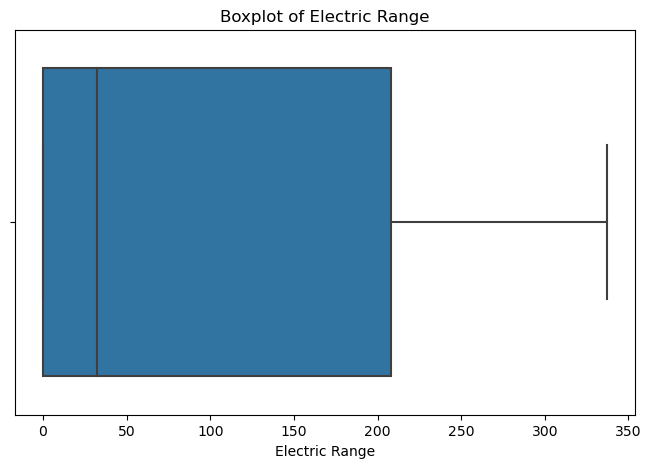

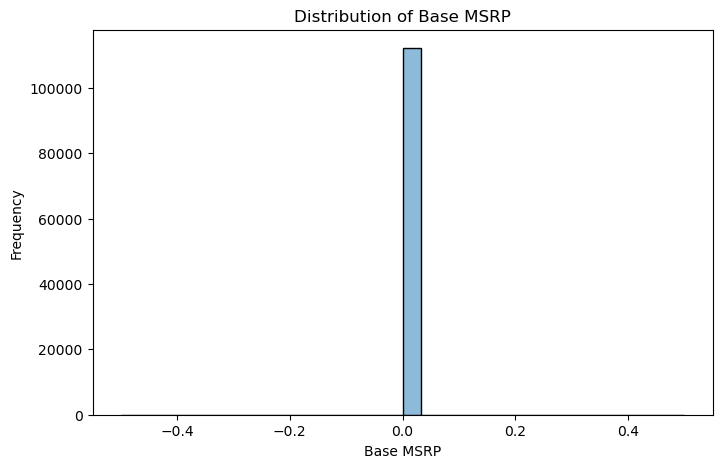

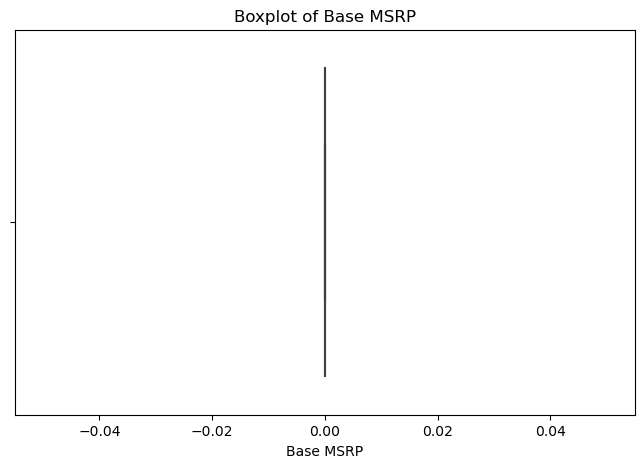

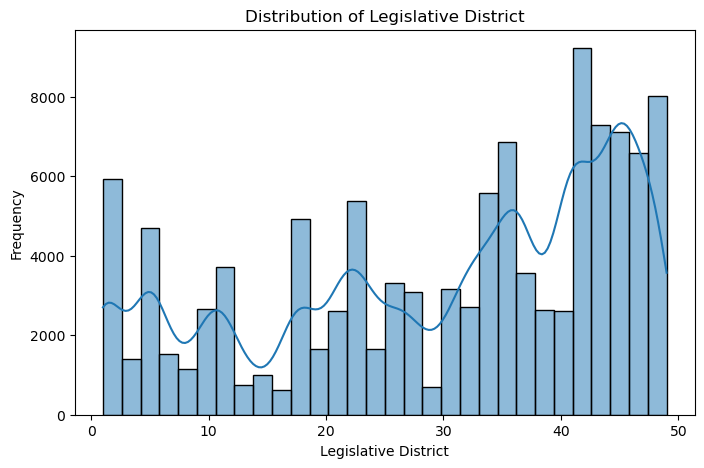

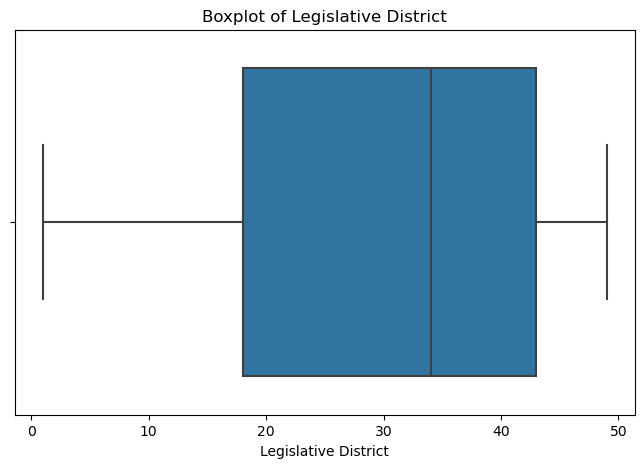

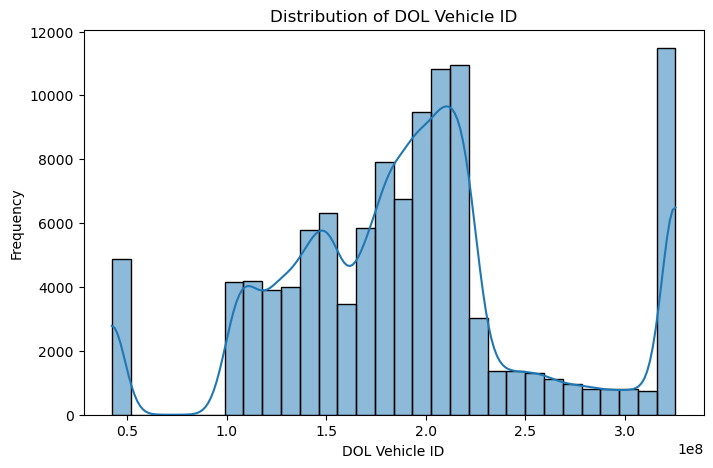

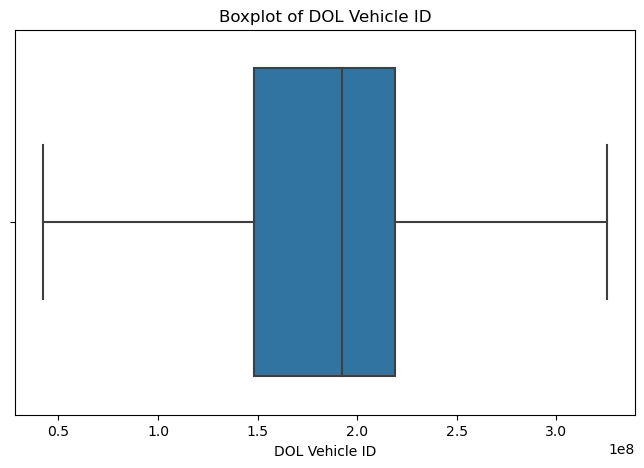

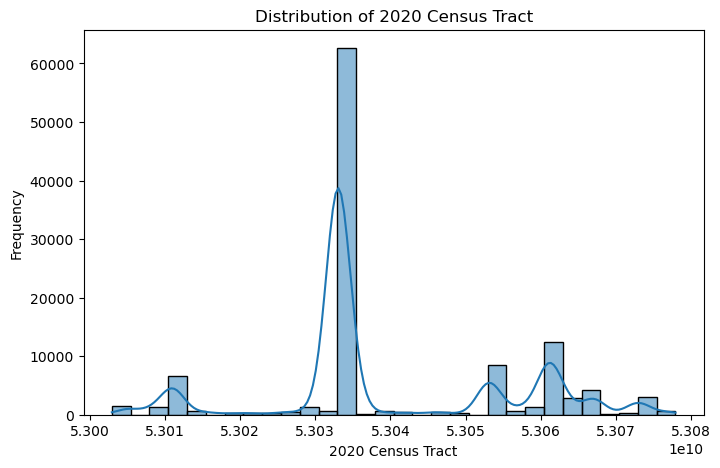

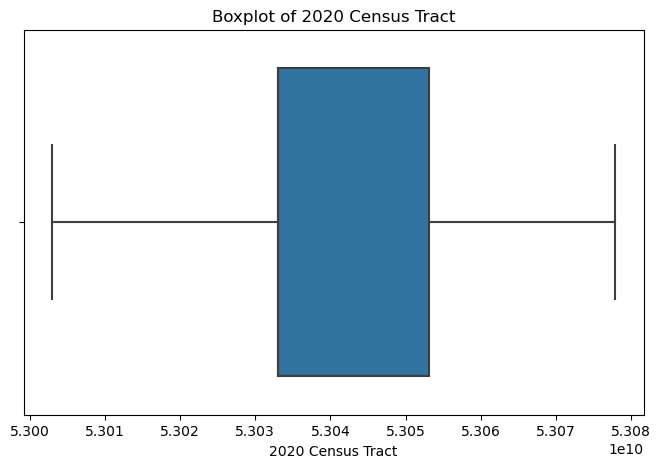

In [45]:
# Histograms for numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot to identify outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


#_For Categorical Columns_

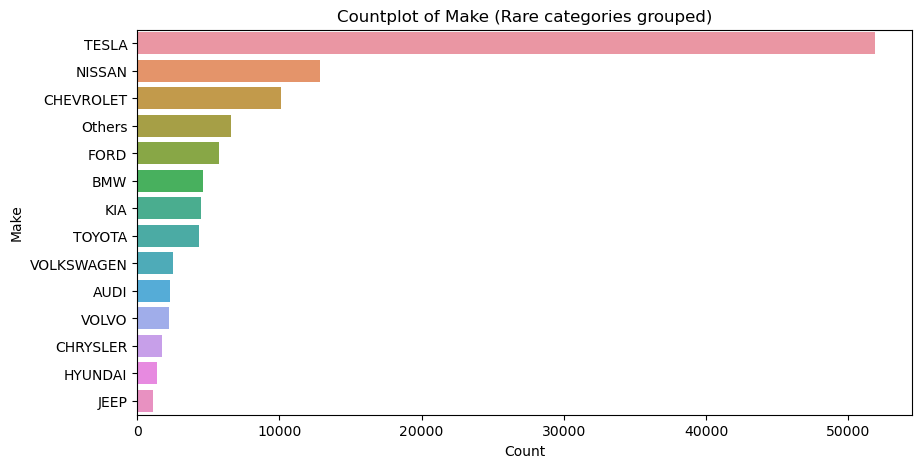

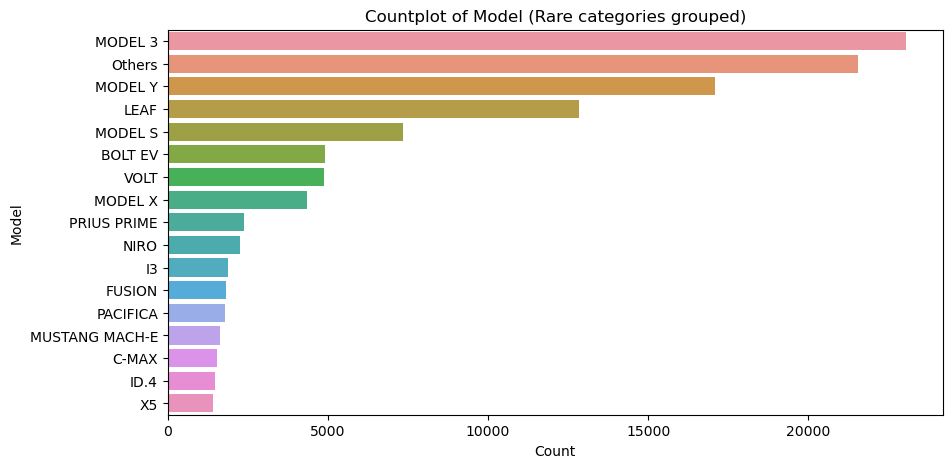

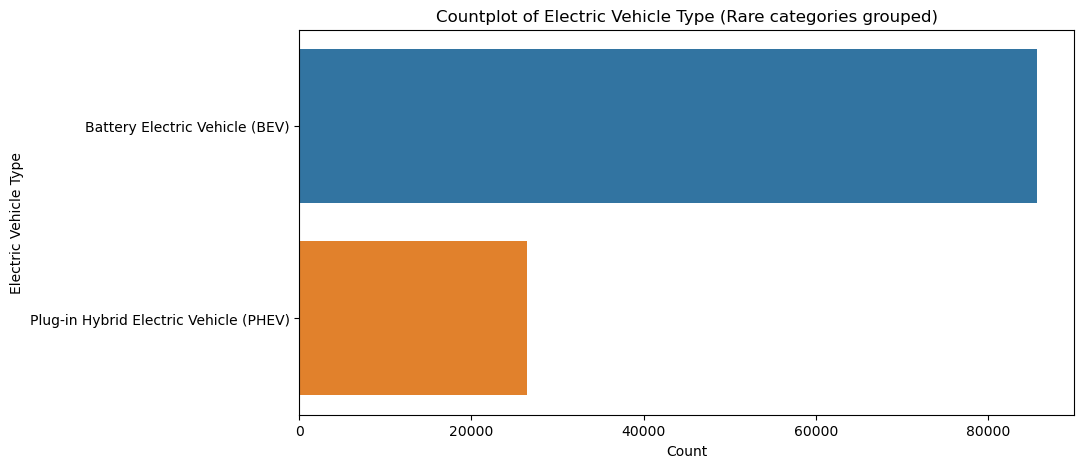

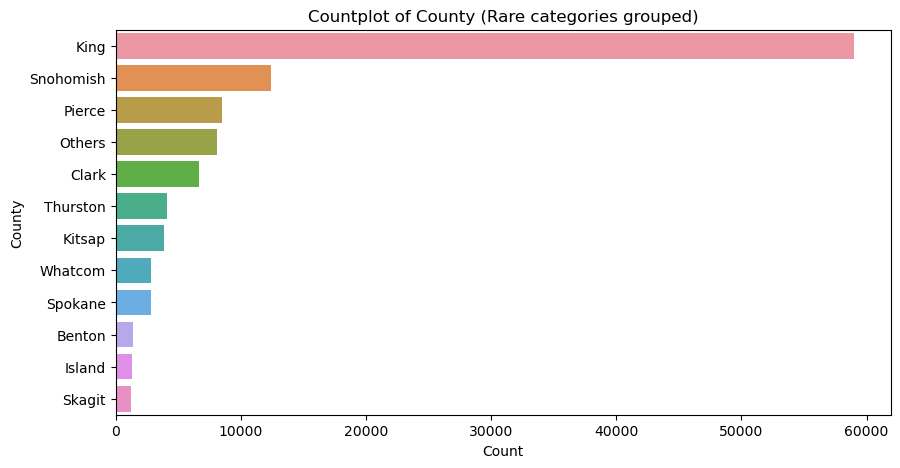

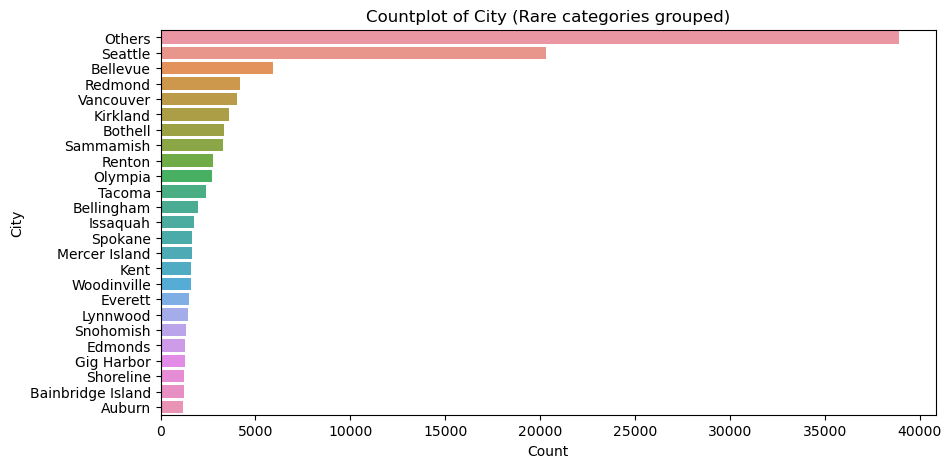

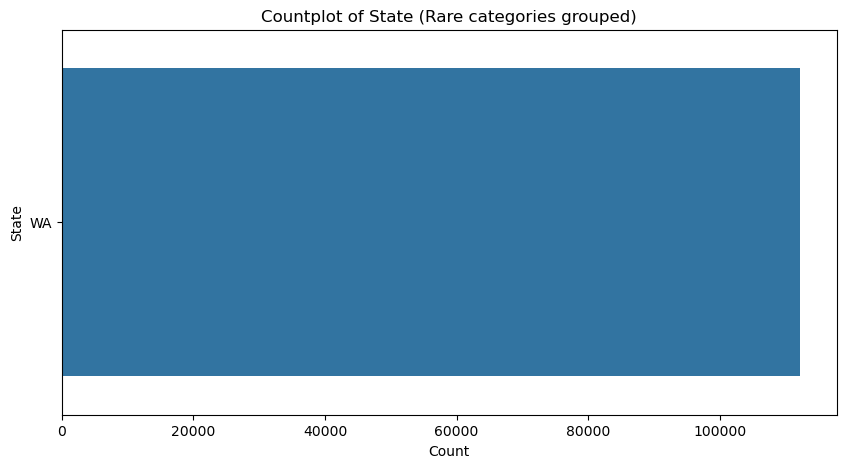

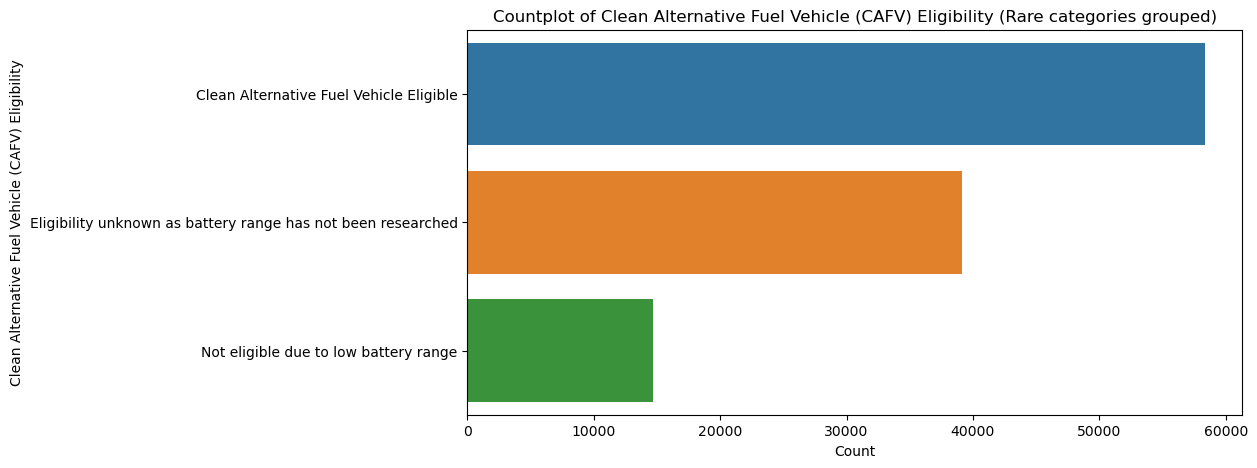

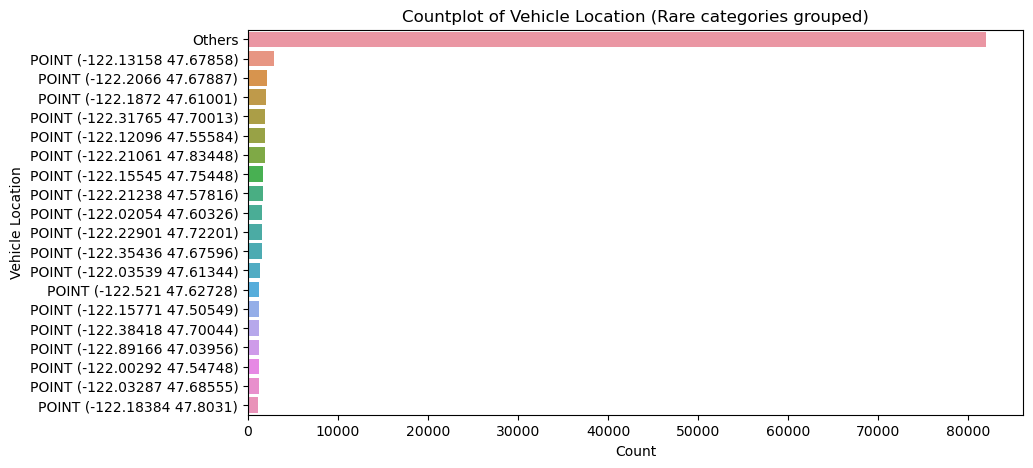

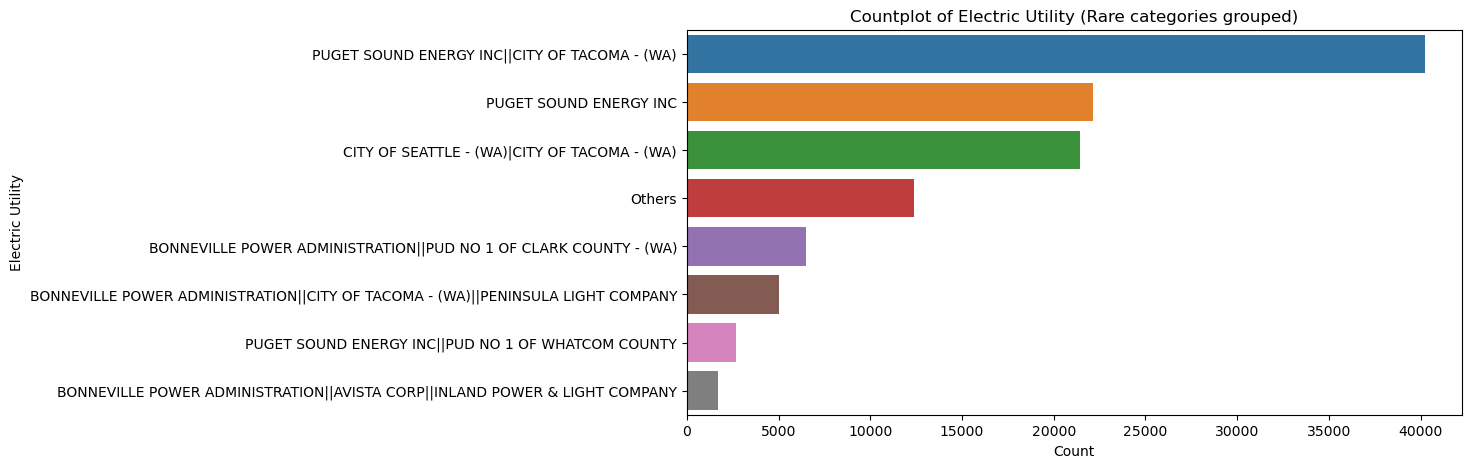

In [46]:
# Countplots for categorical features
categorical_columns = ['Make', 'Model', 'Electric Vehicle Type', 'County', 'City', 'State', 
                       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']
def group_rare_categories(series, threshold=0.01):
    # Get the categories with frequencies above the threshold
    total_count = len(series)
    value_counts = series.value_counts()
    mask = value_counts / total_count < threshold
    # Replace rare categories with "Others"
    return np.where(series.isin(value_counts[mask].index), 'Others', series)

# Define the threshold to group rare categories (e.g., 1% or less)
threshold = 0.01

for column in categorical_columns:
    df[column] = group_rare_categories(df[column], threshold)
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Countplot of {column} (Rare categories grouped)')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



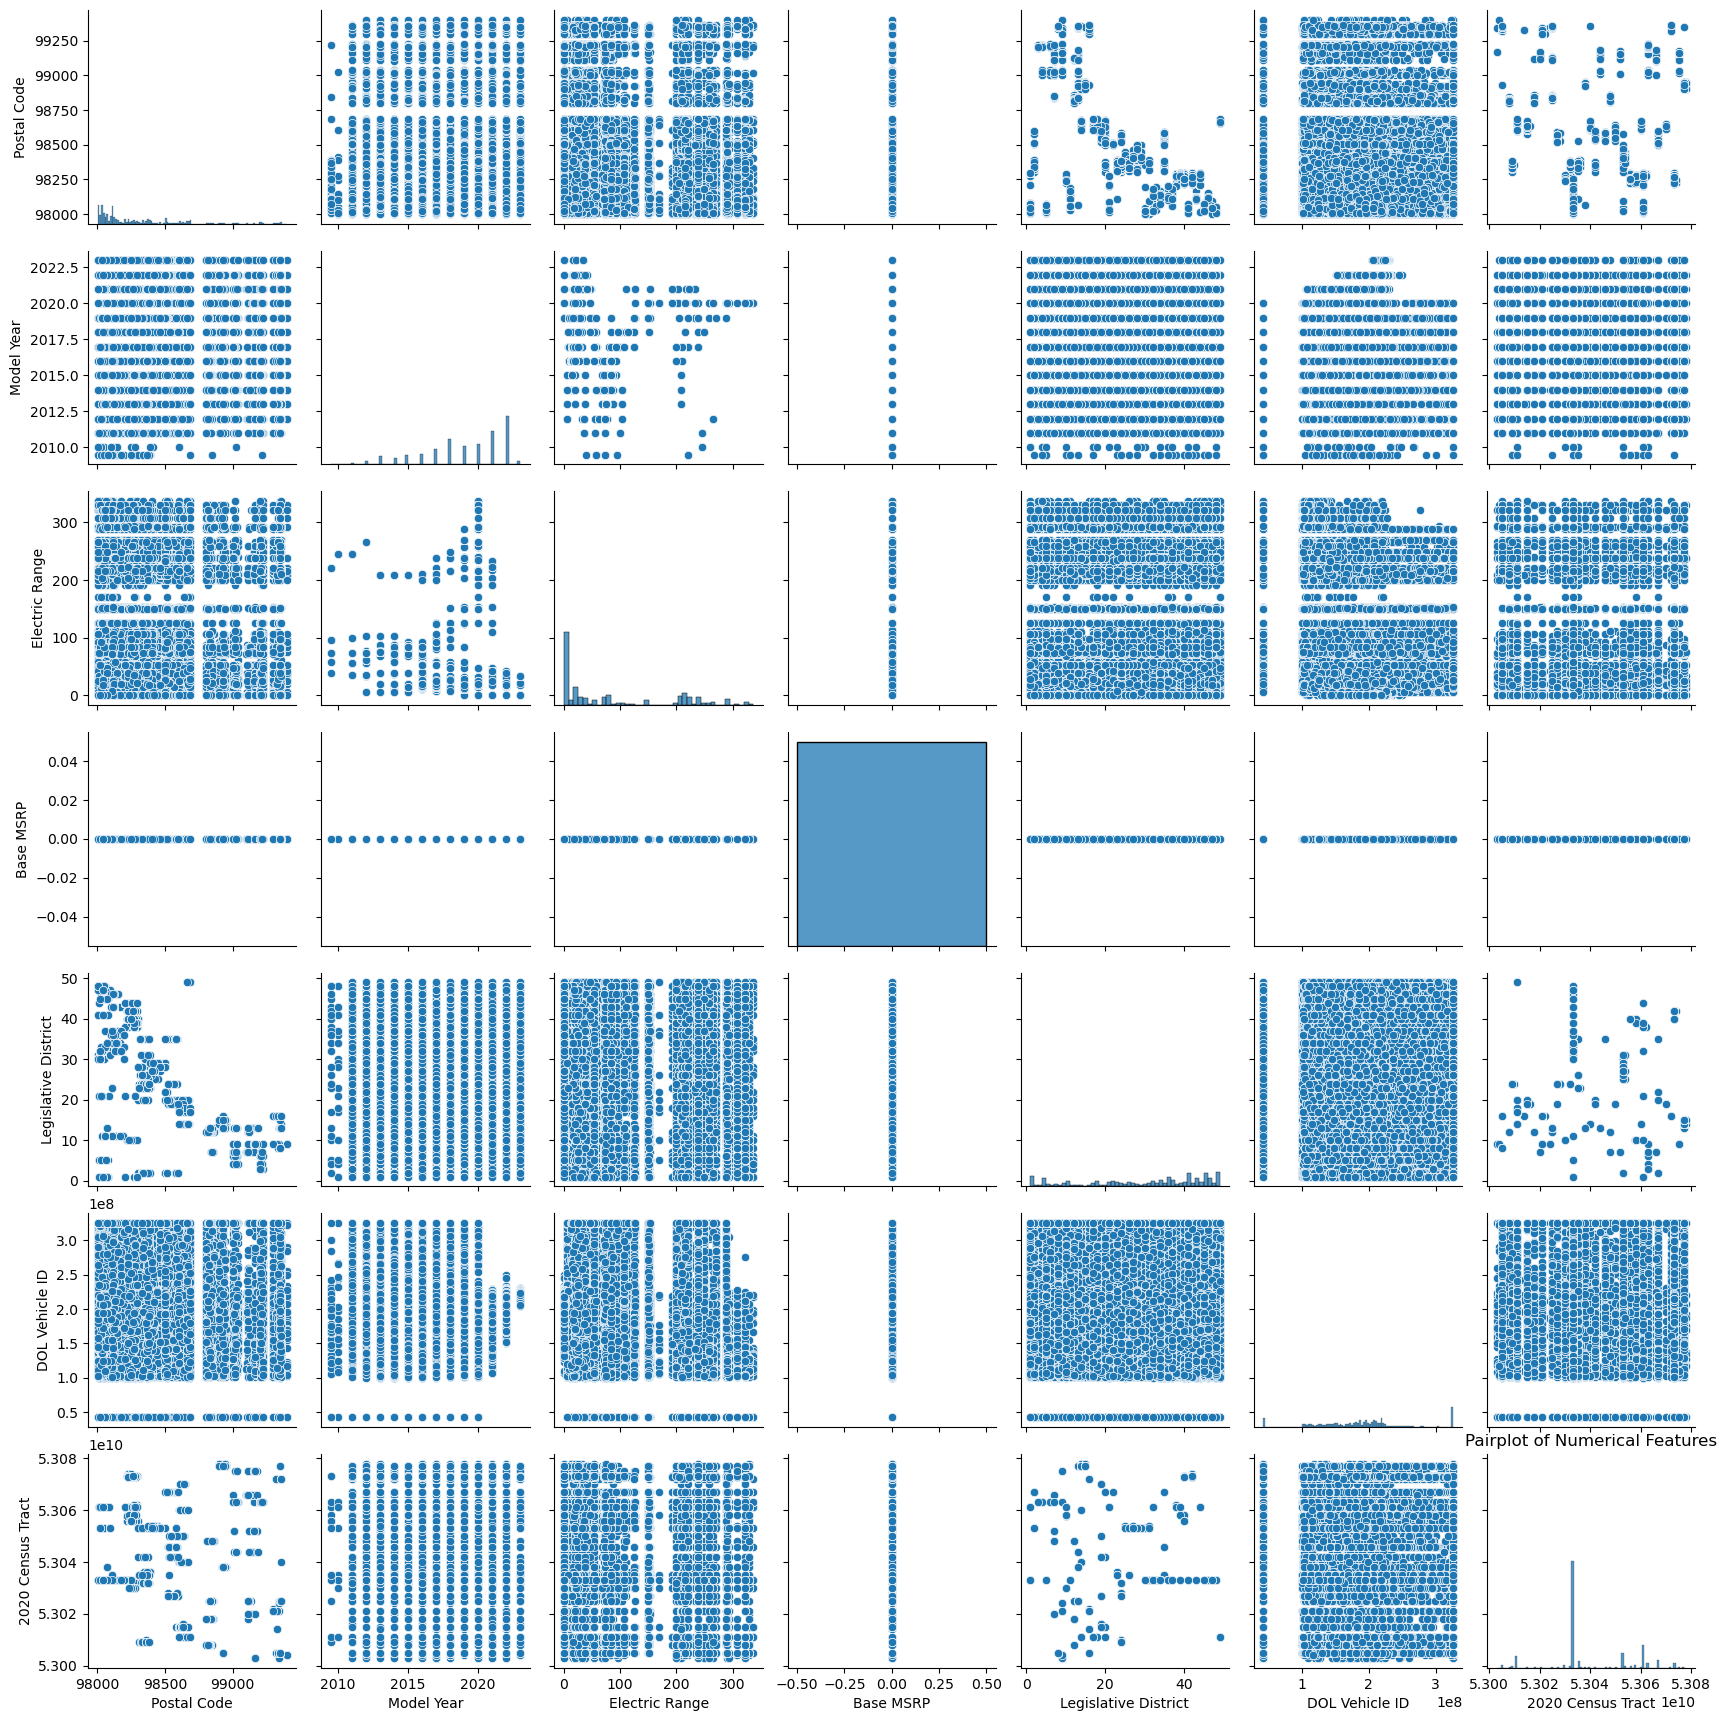

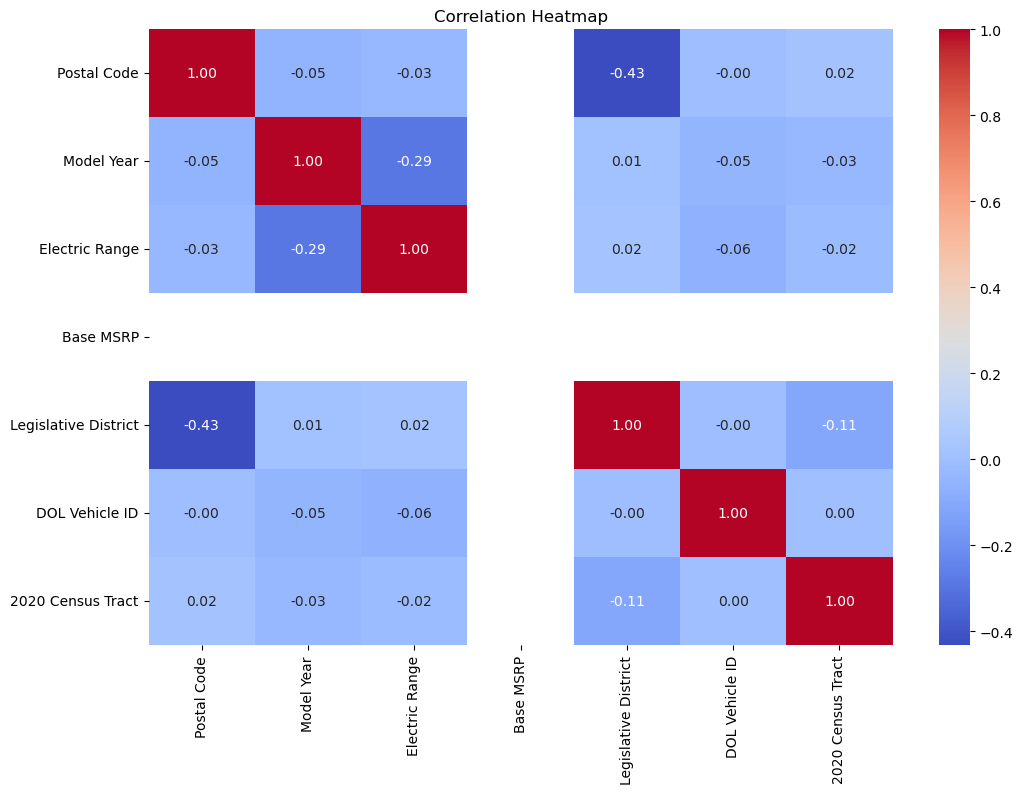

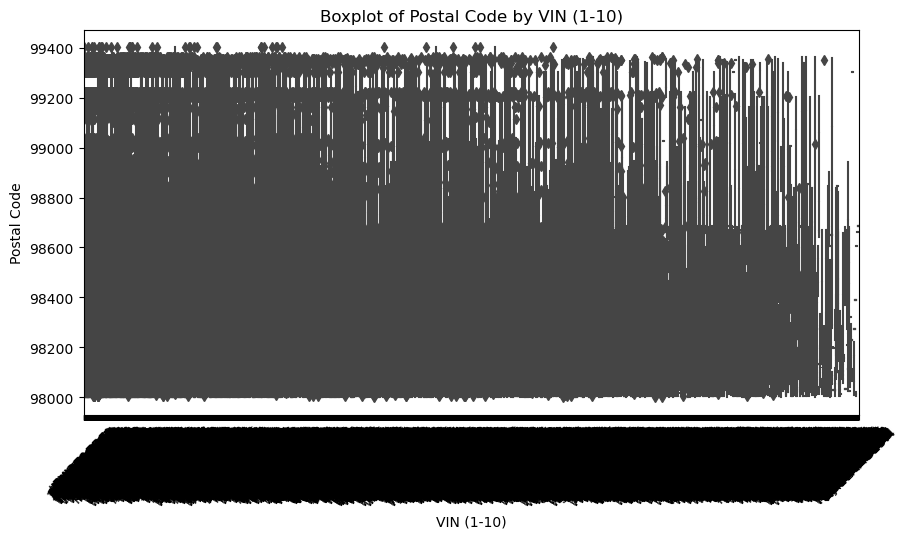

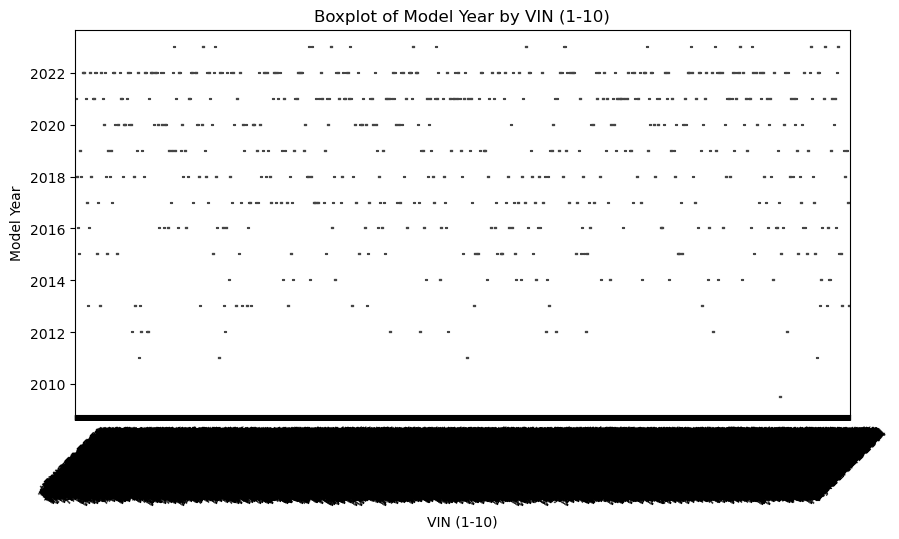

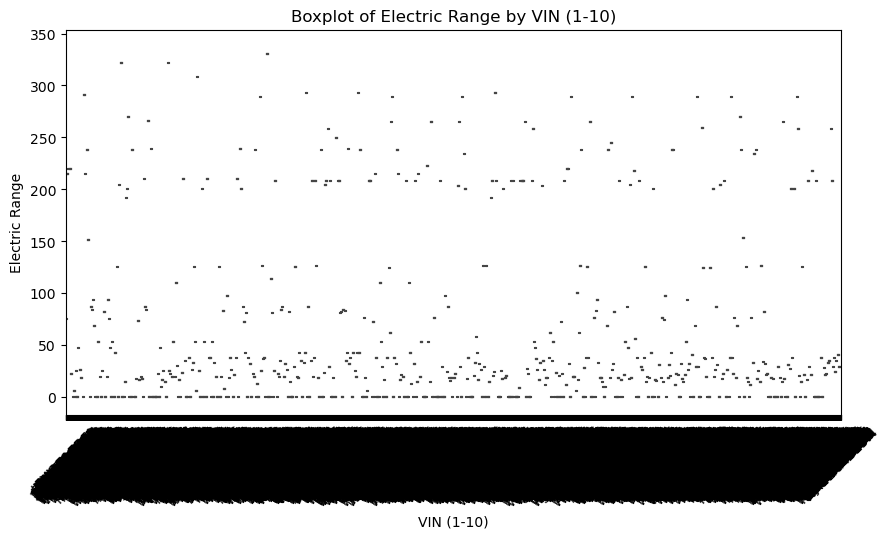

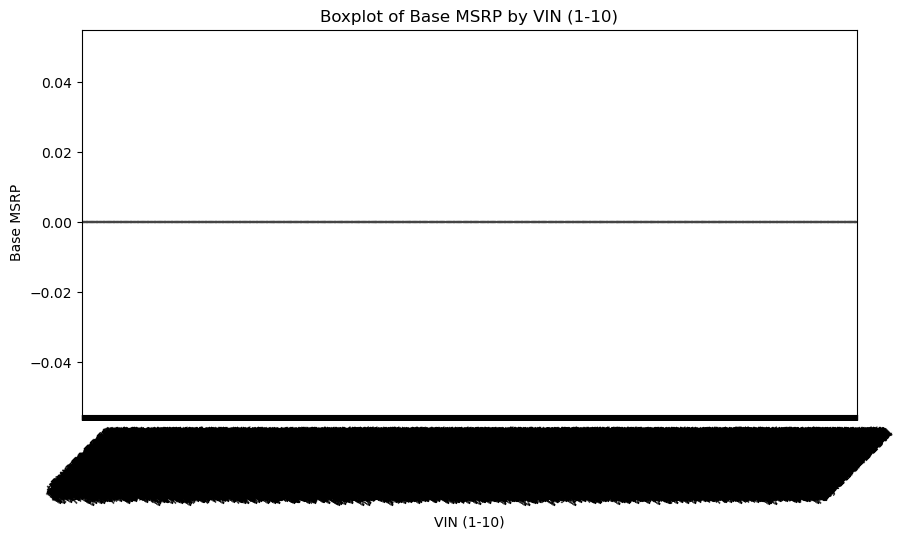

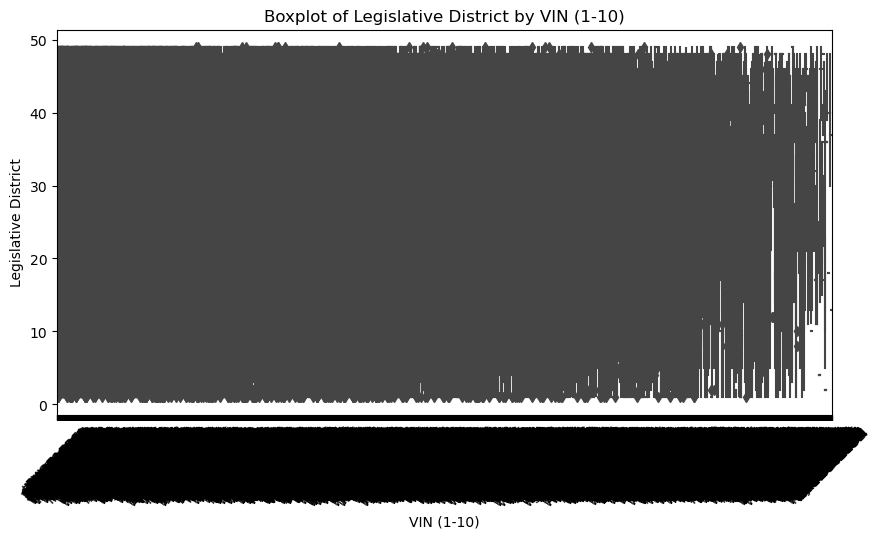

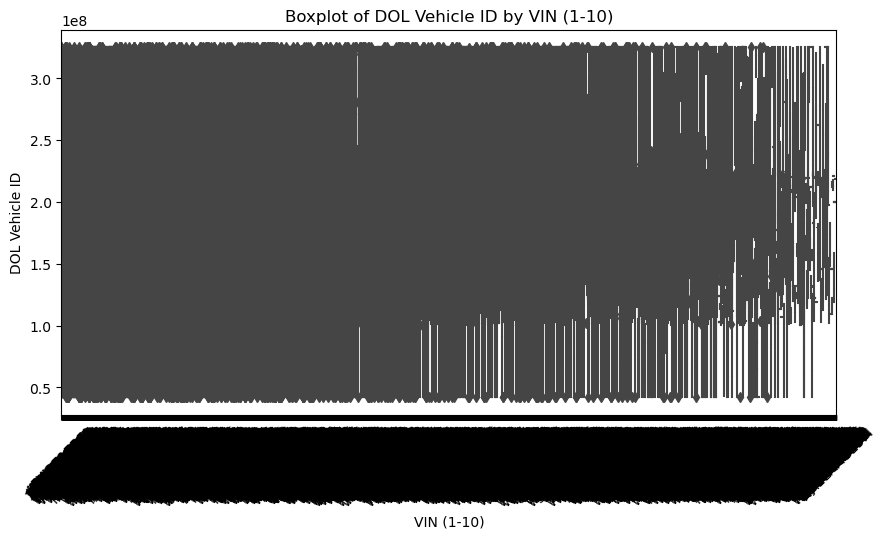

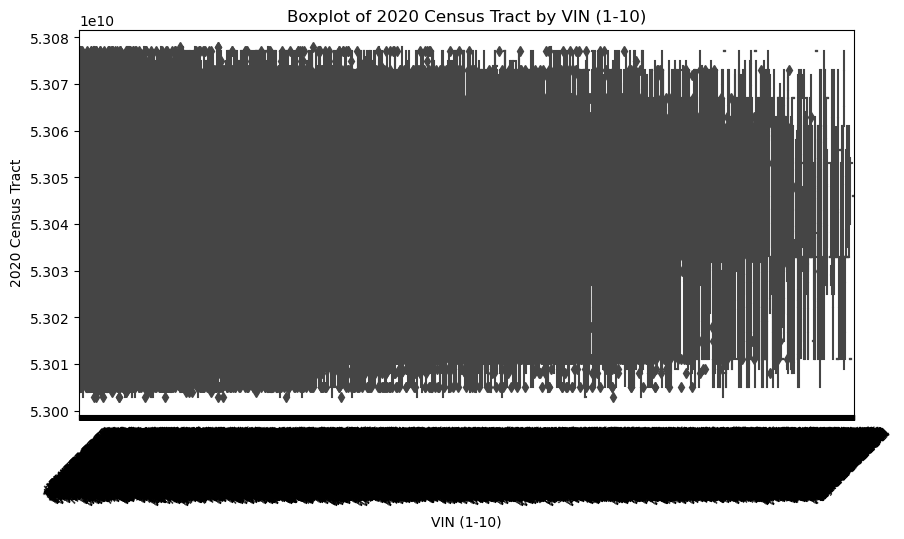

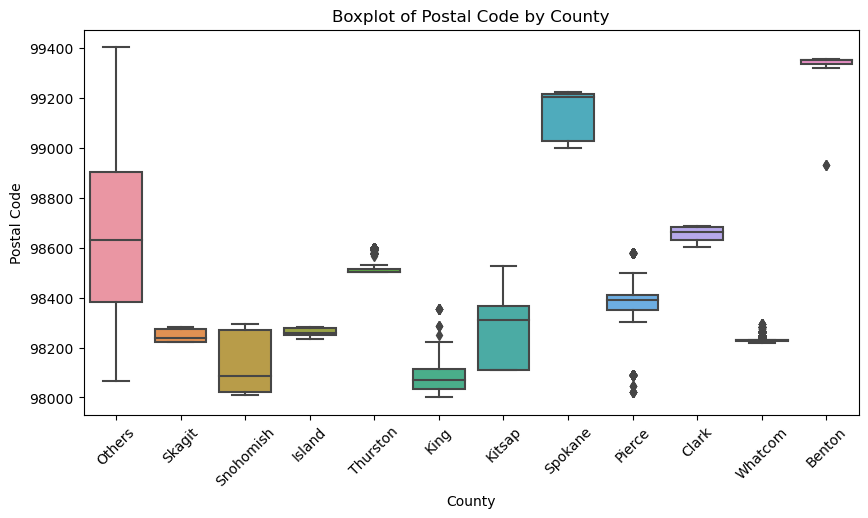

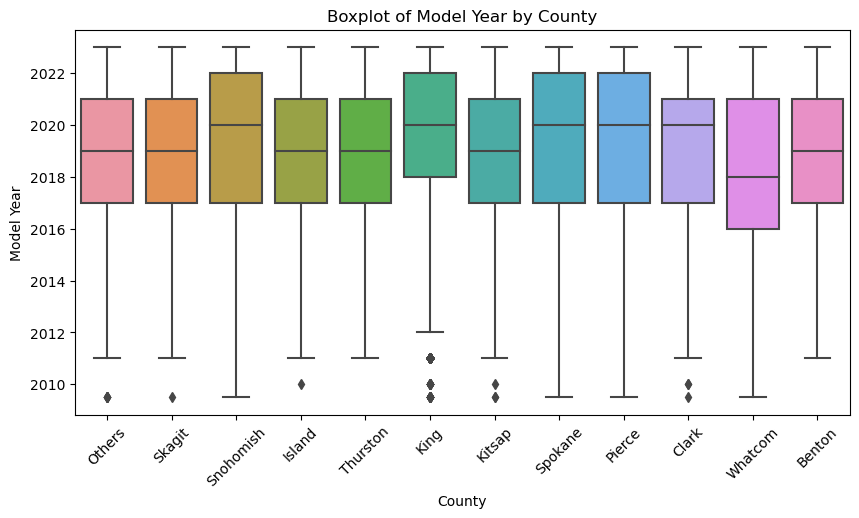

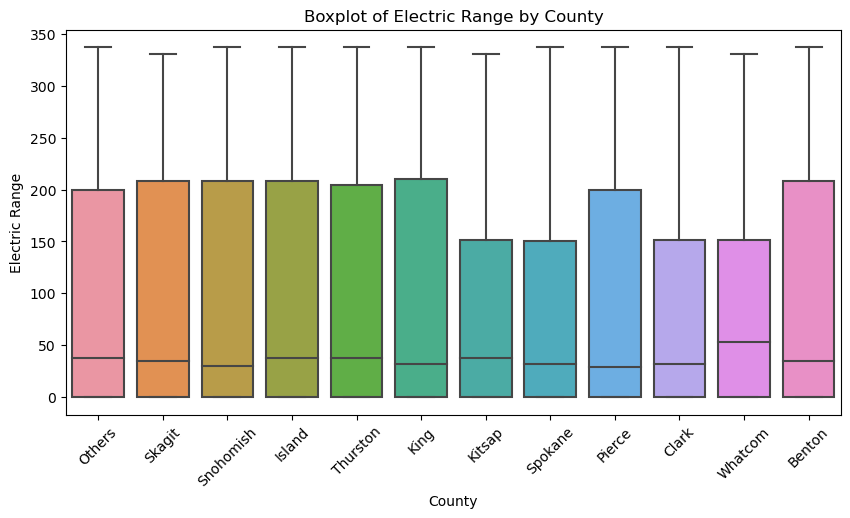

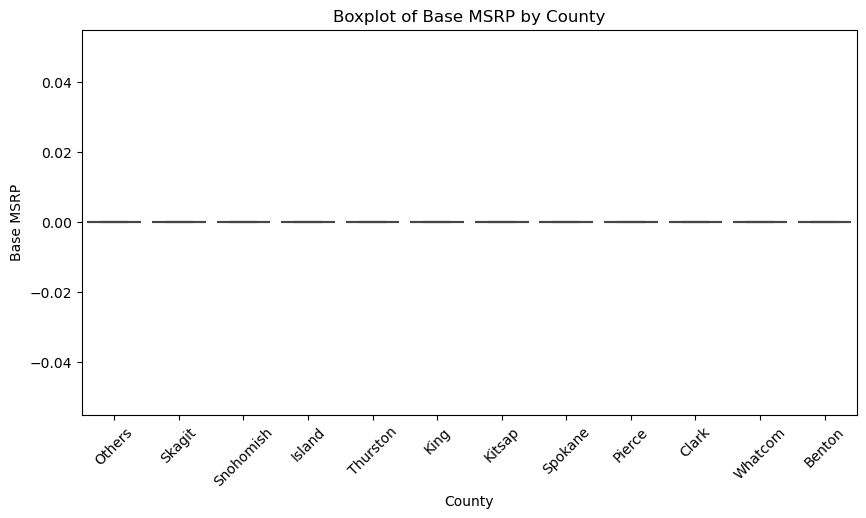

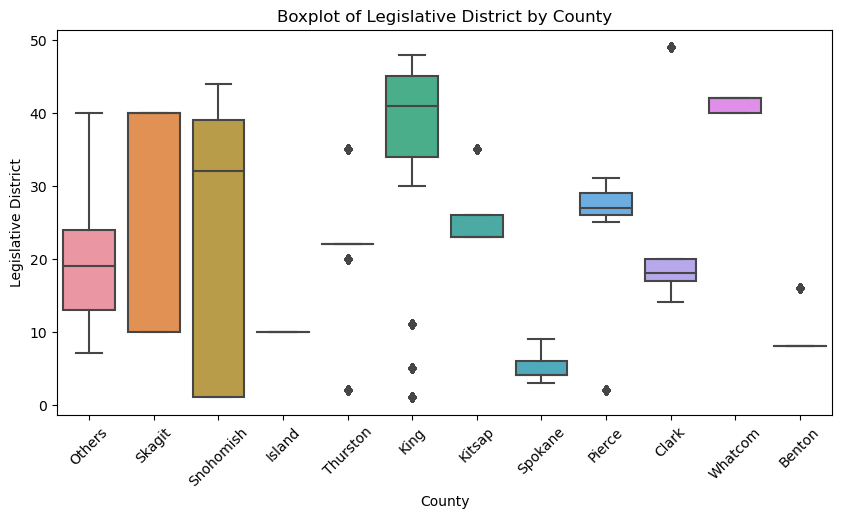

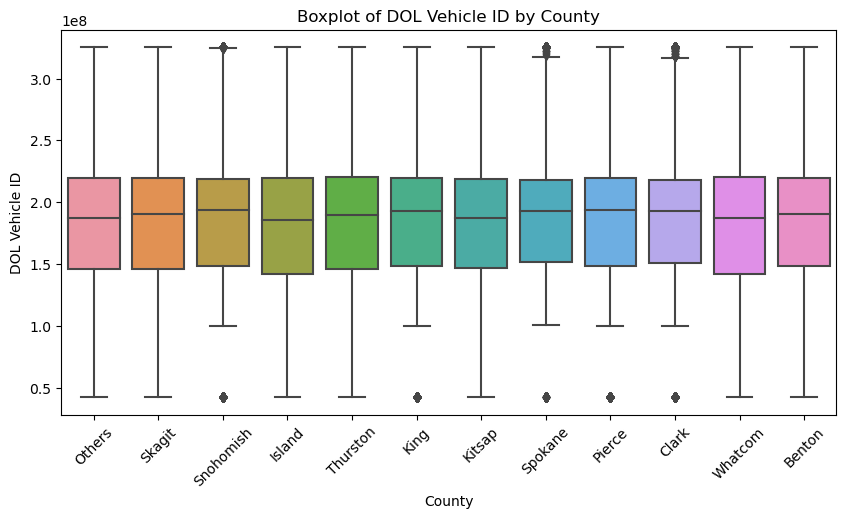

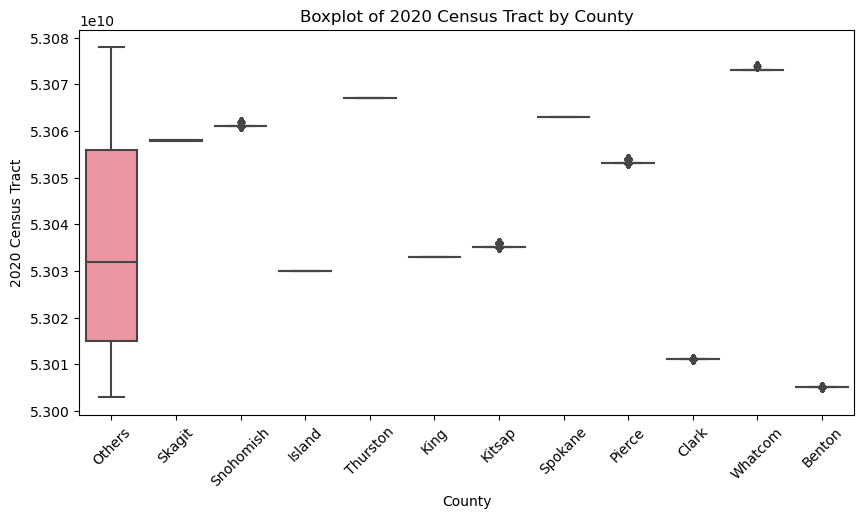

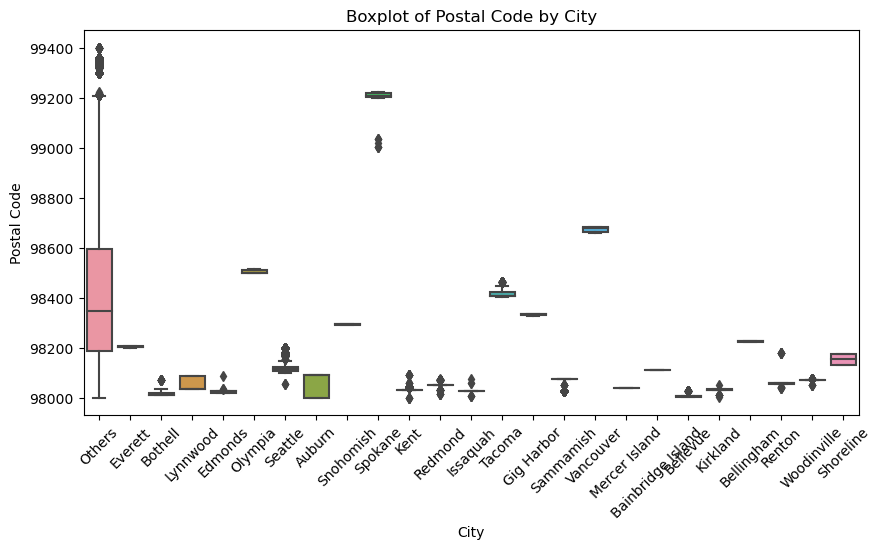

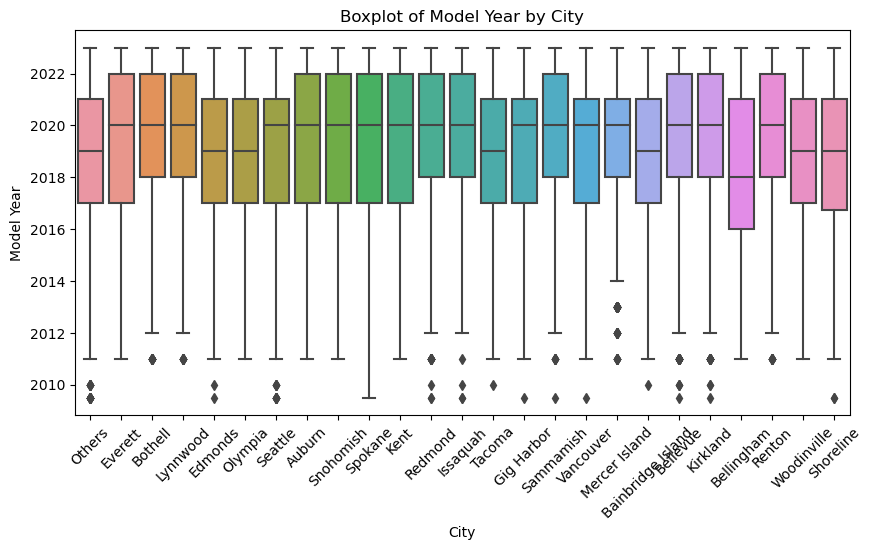

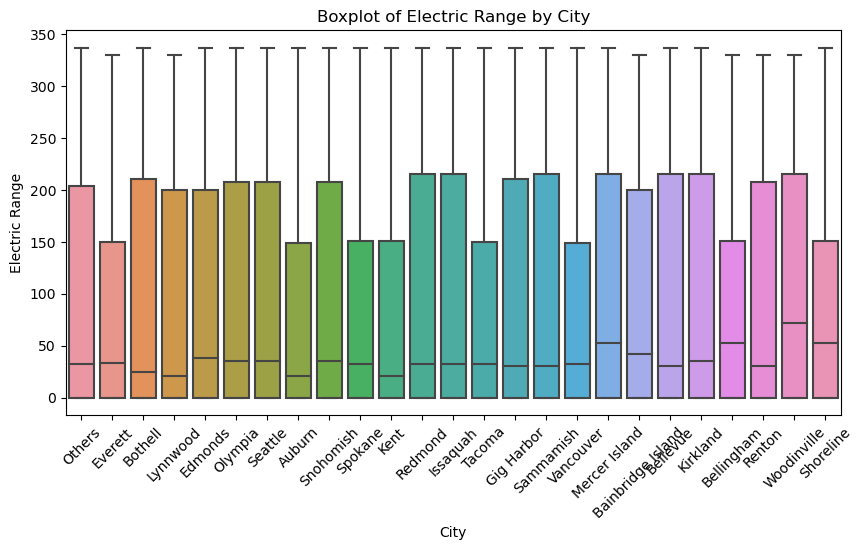

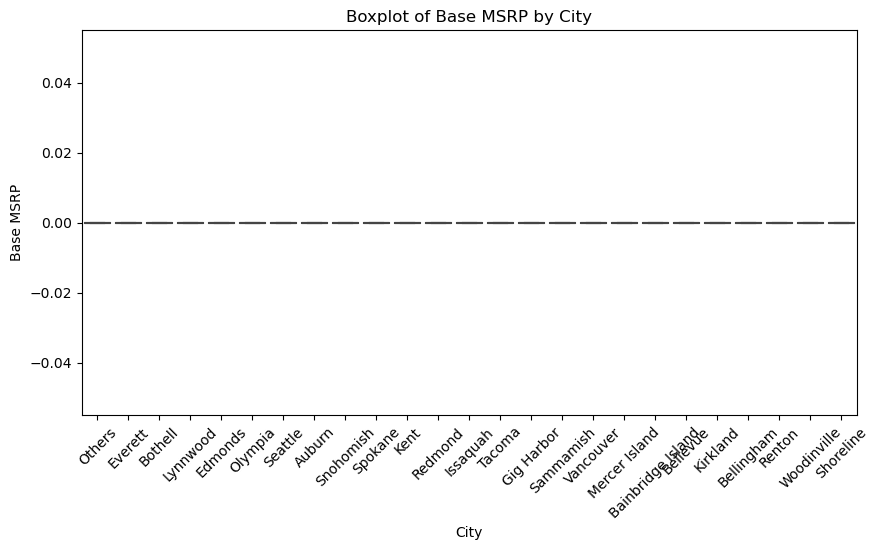

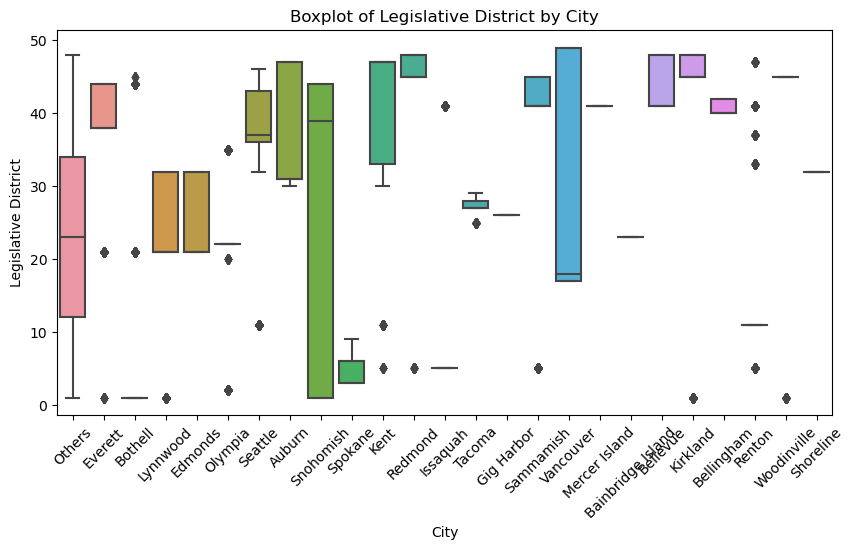

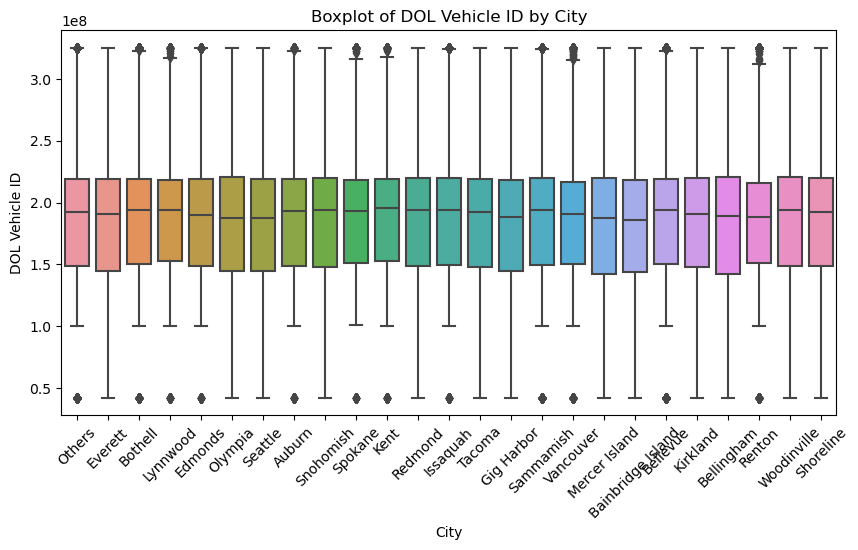

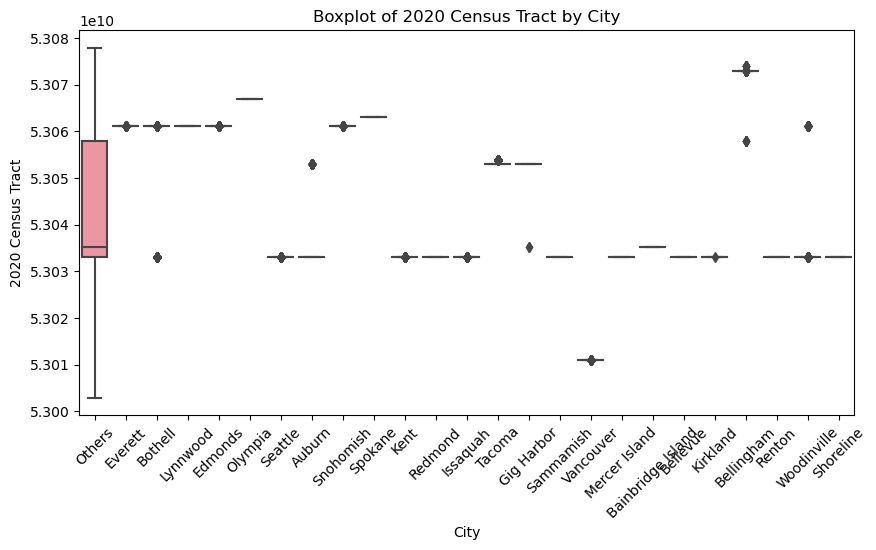

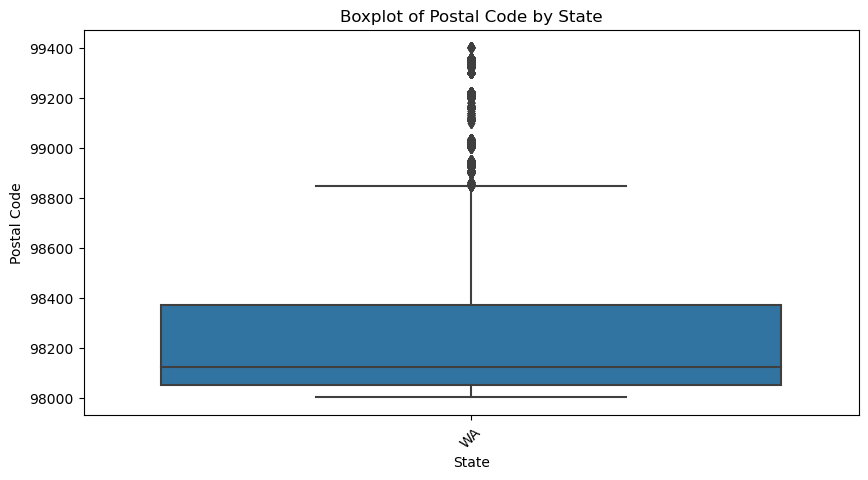

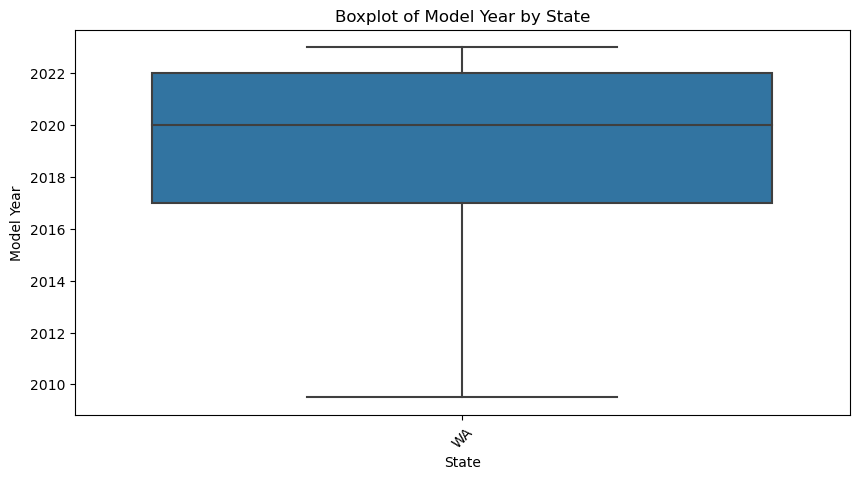

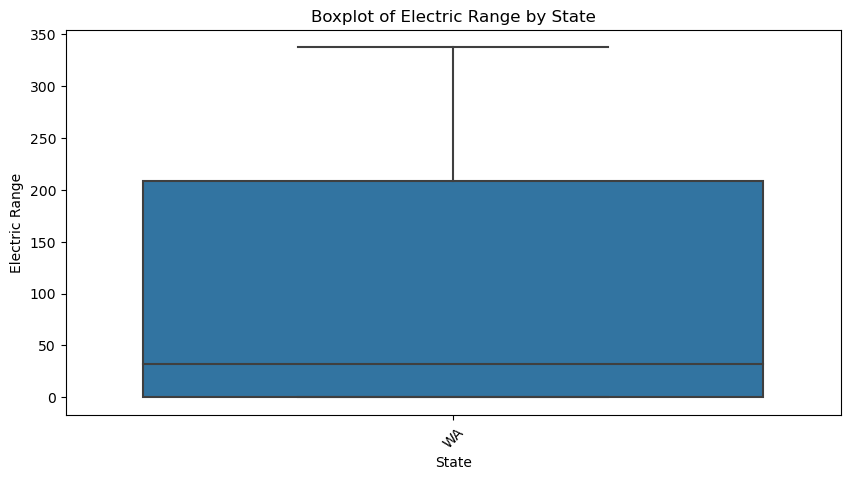

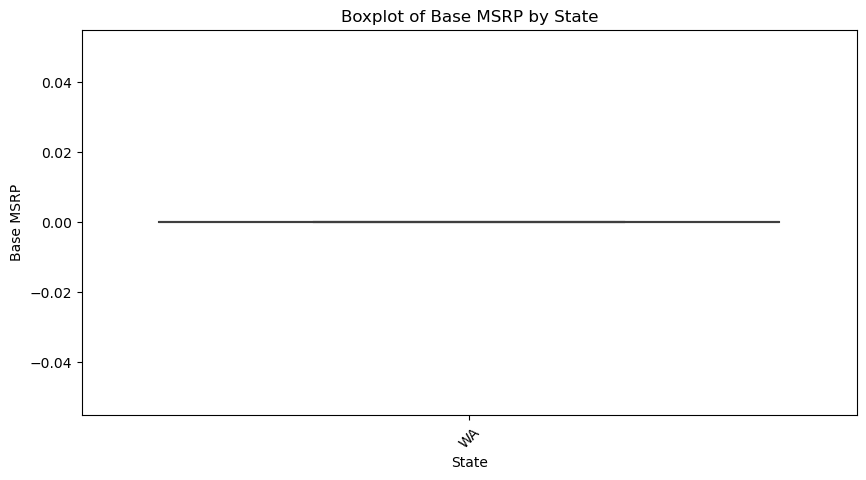

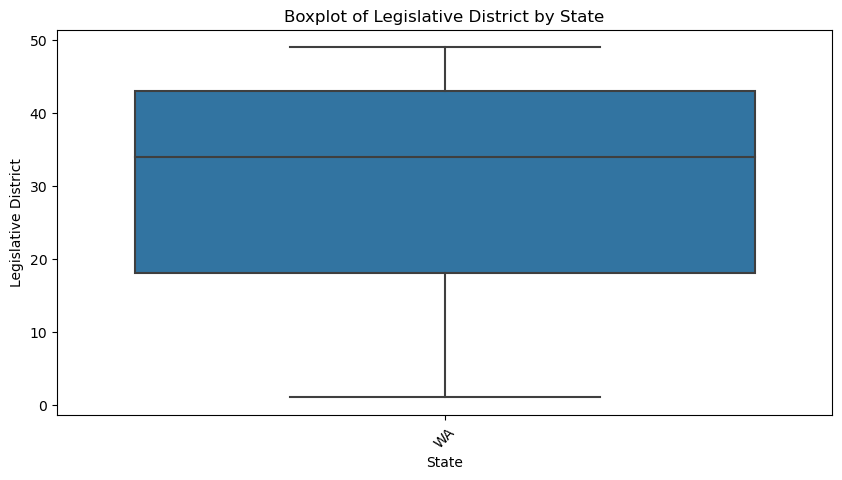

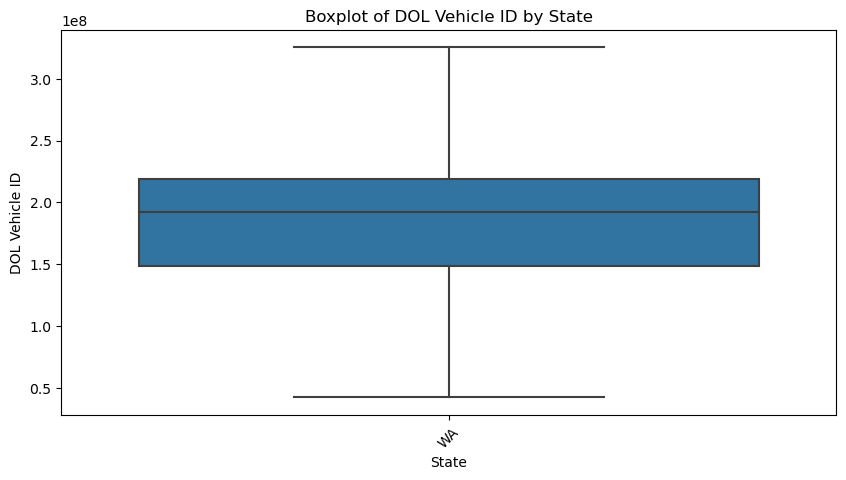

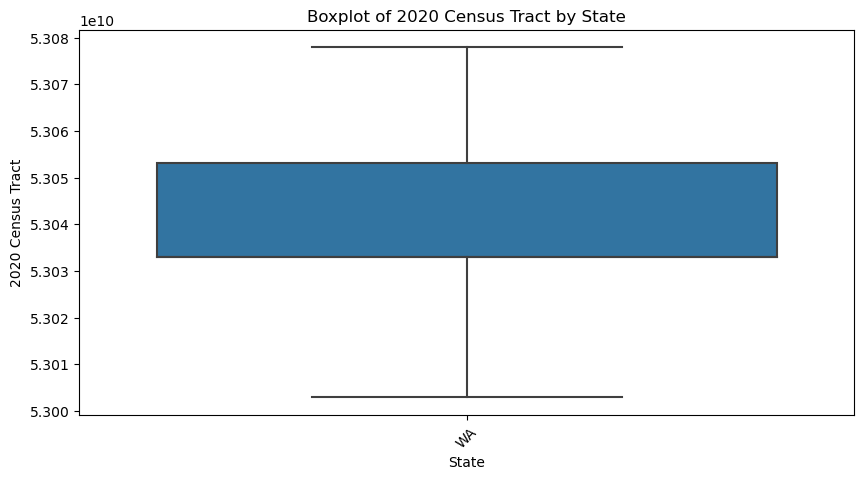

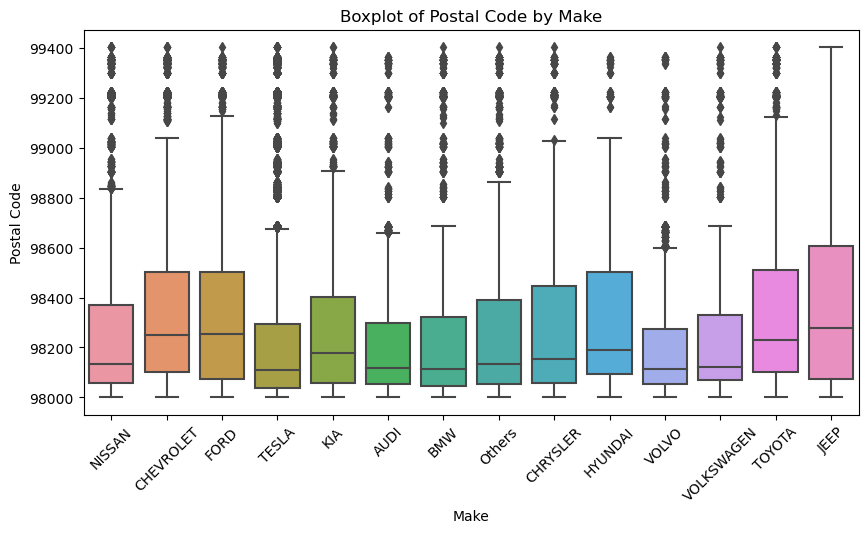

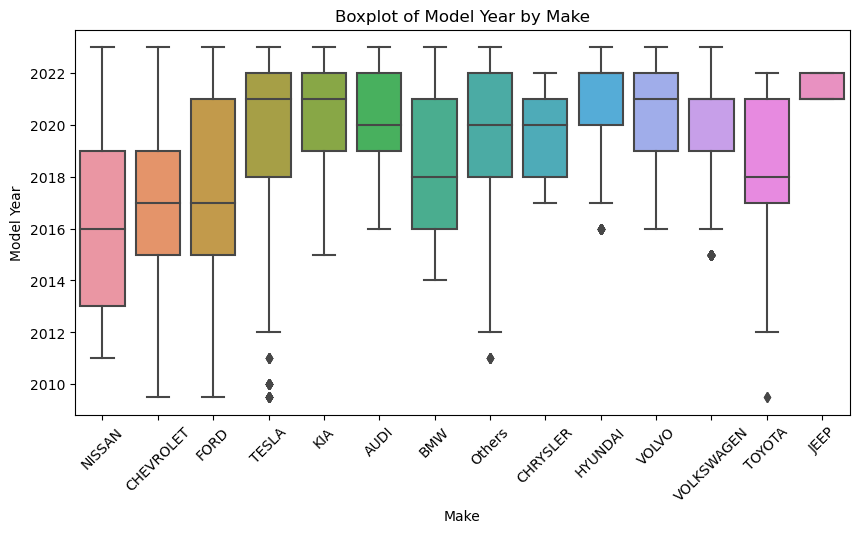

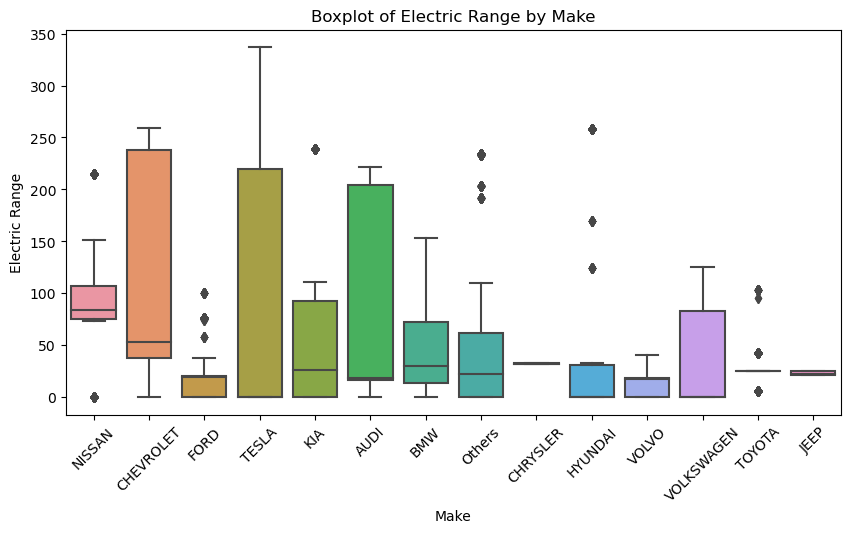

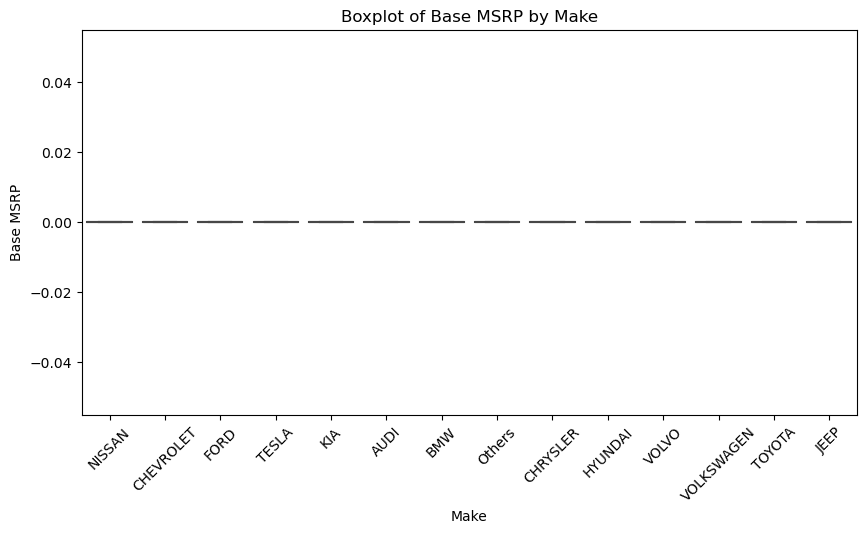

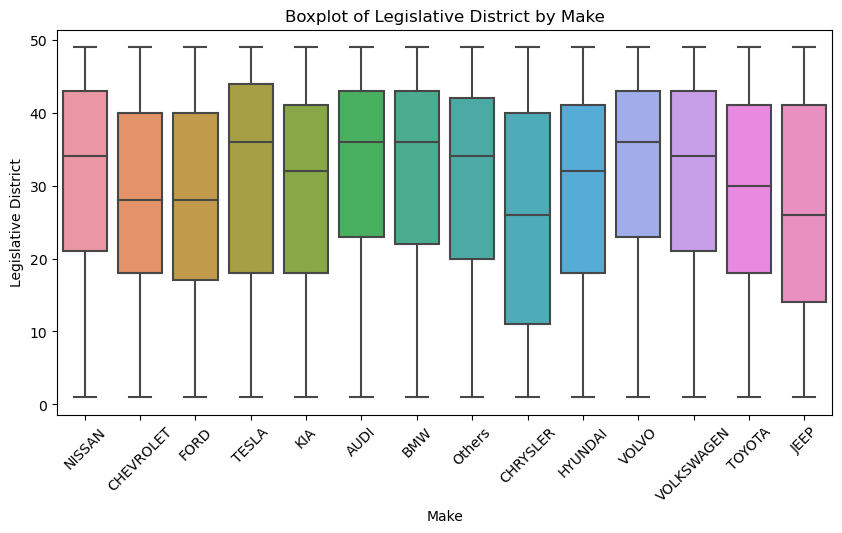

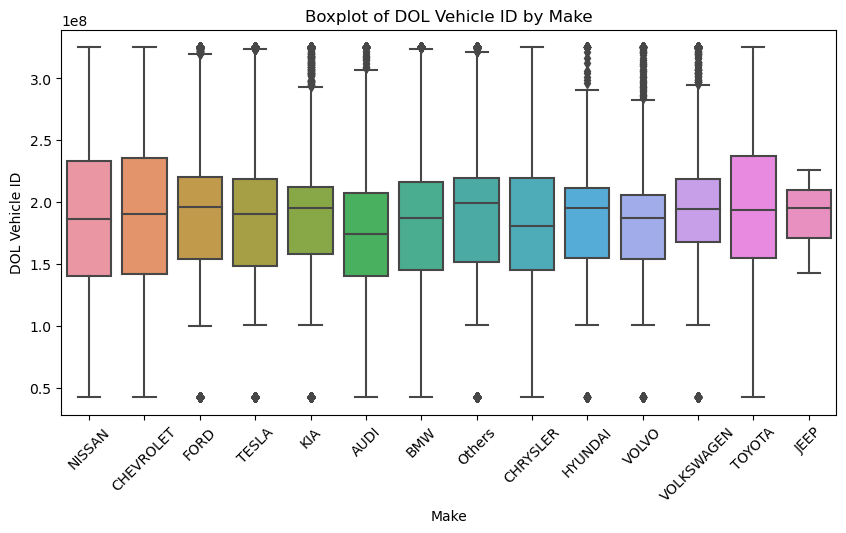

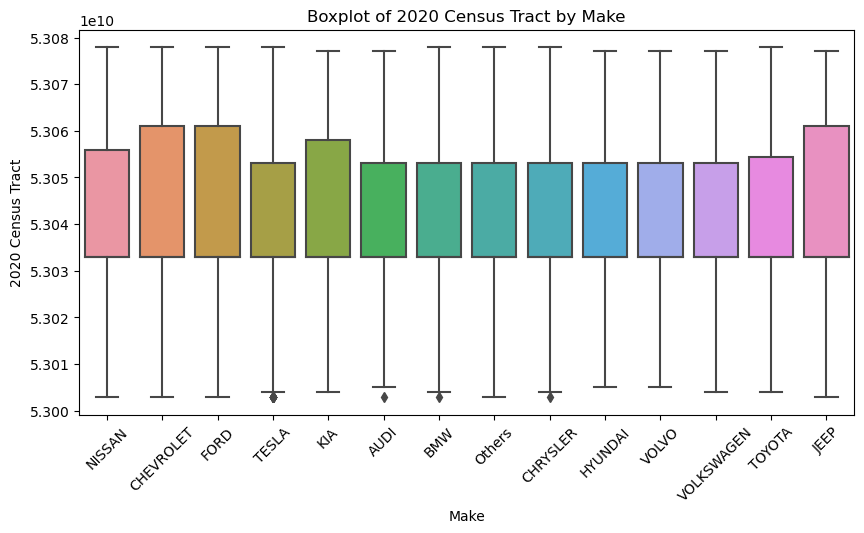

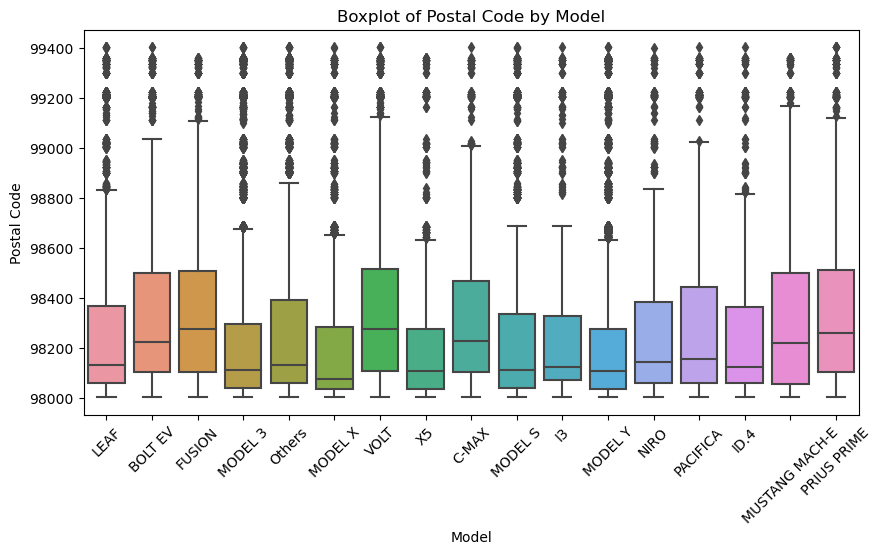

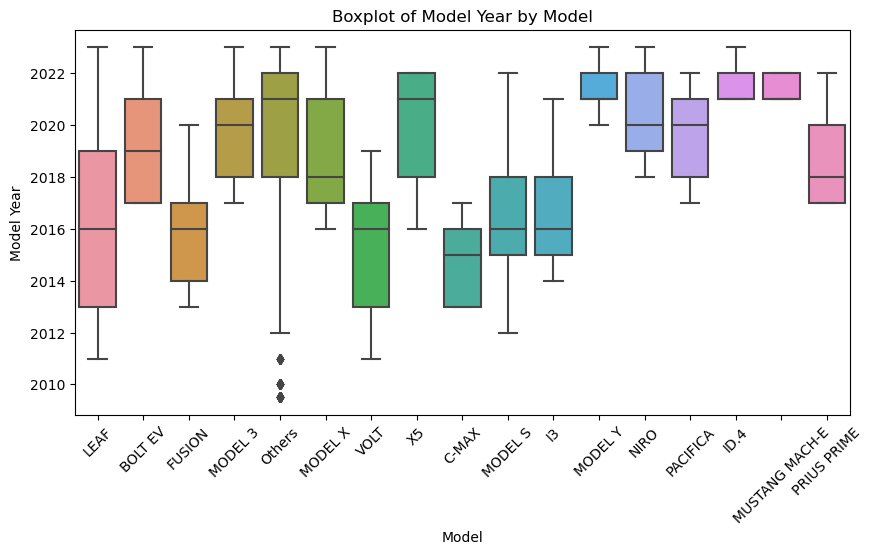

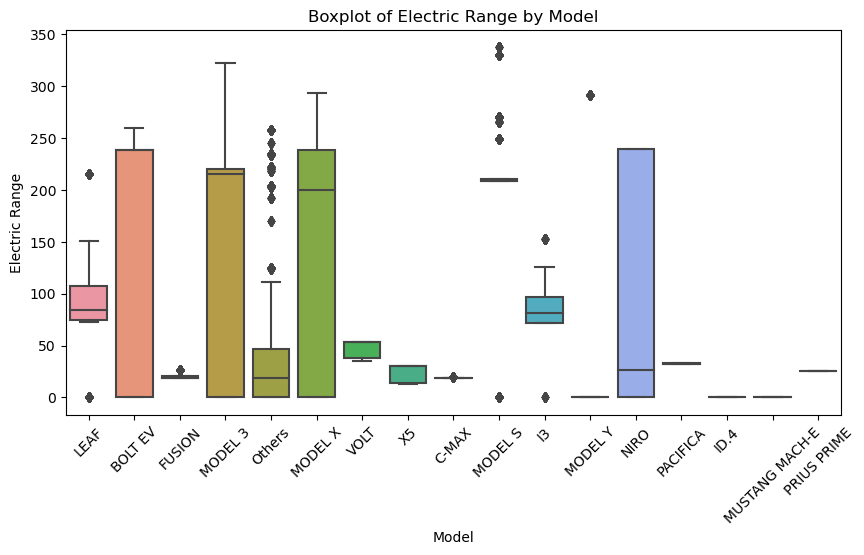

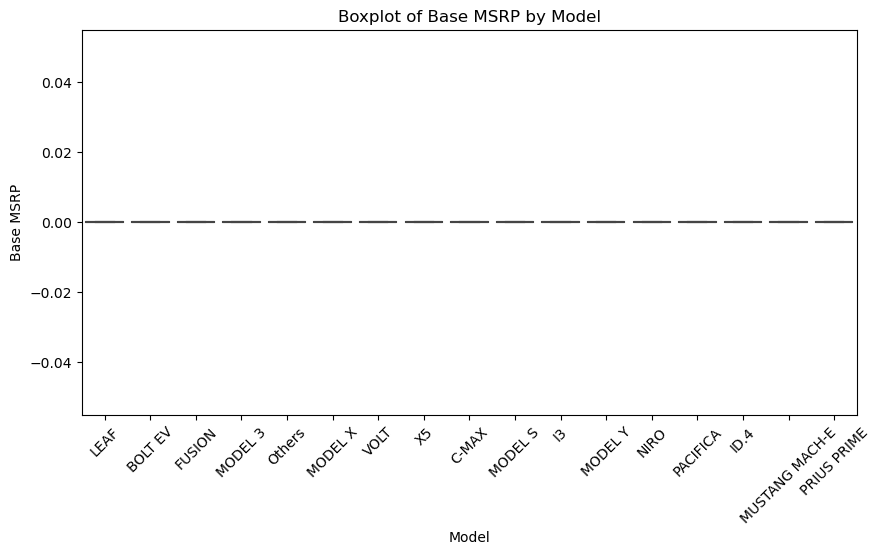

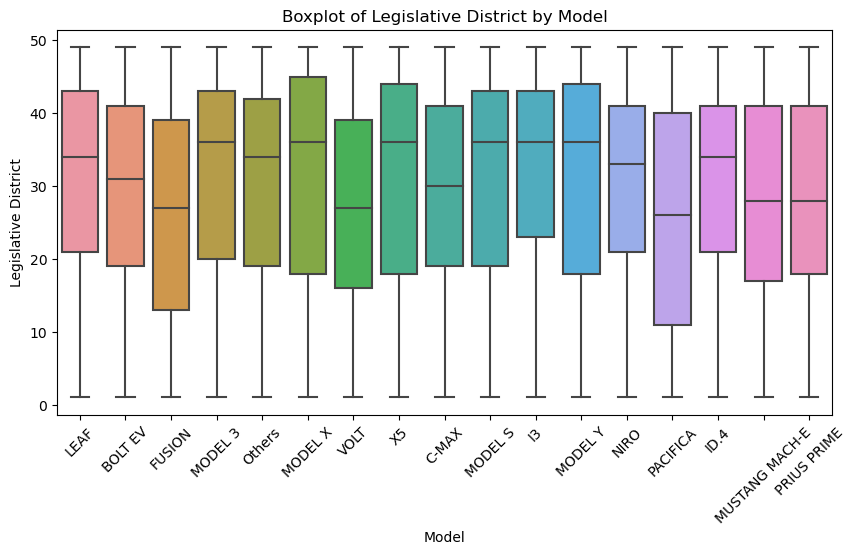

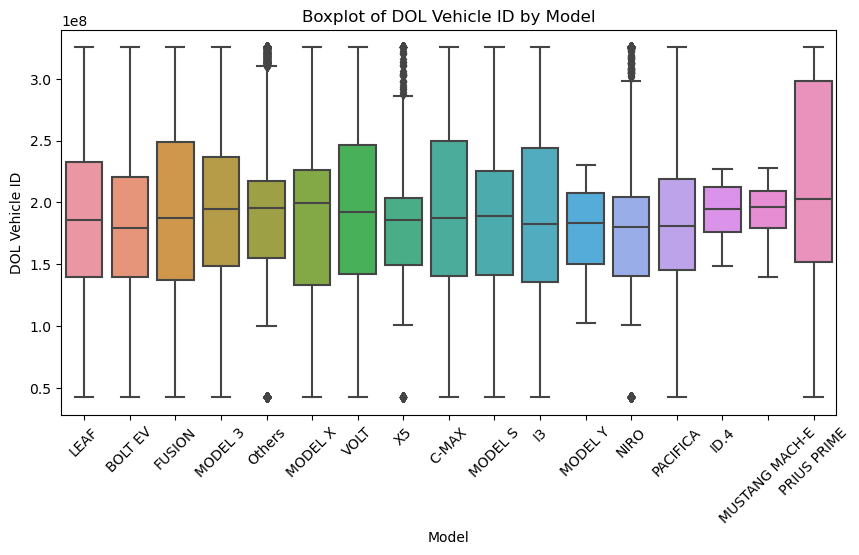

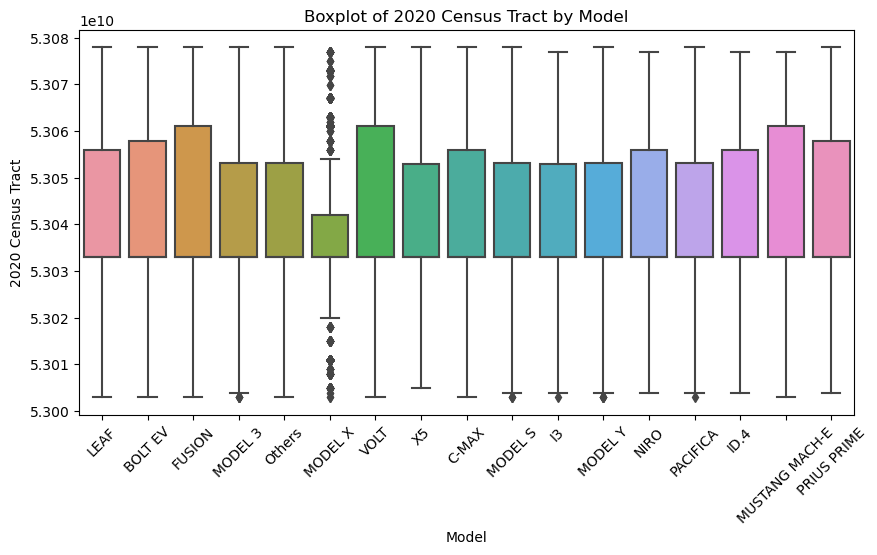

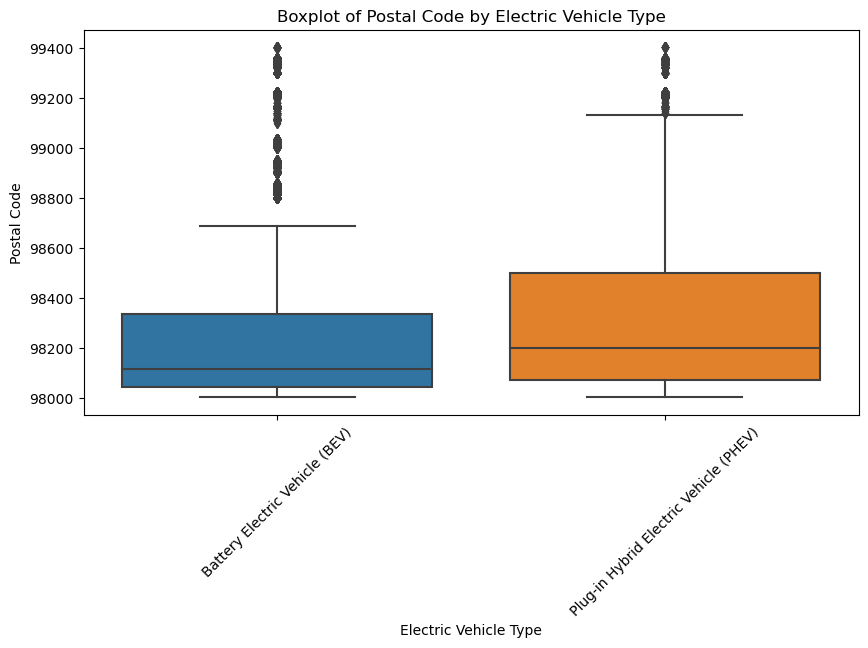

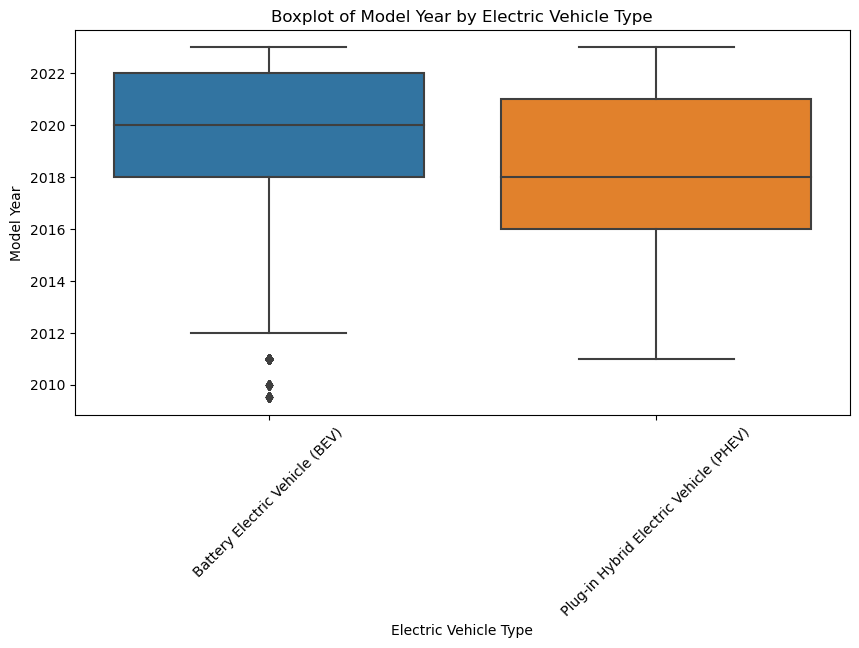

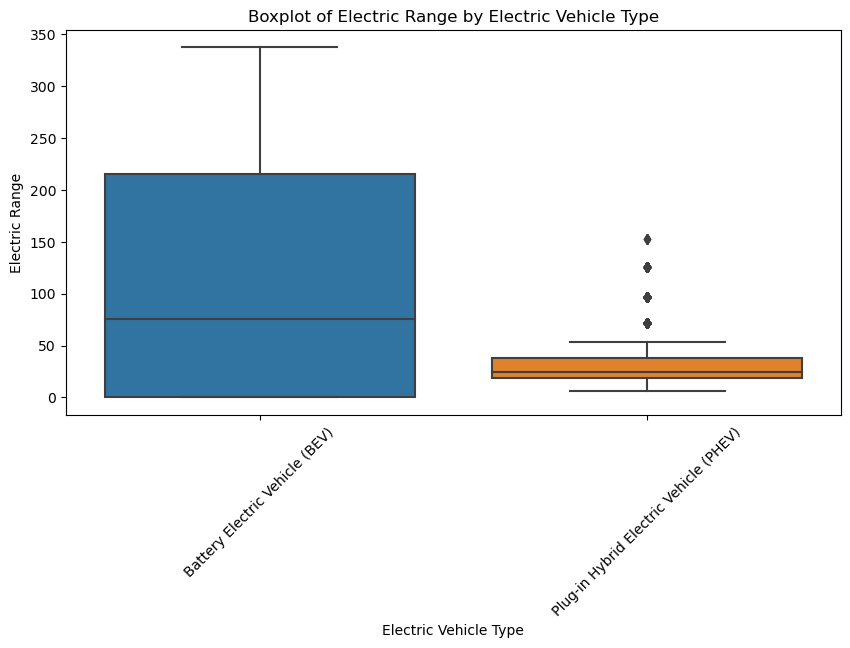

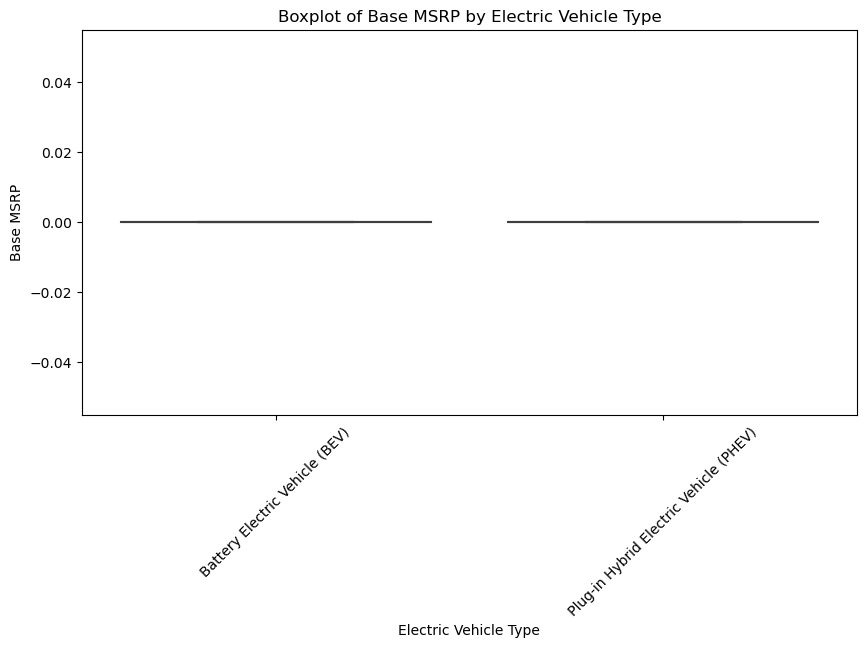

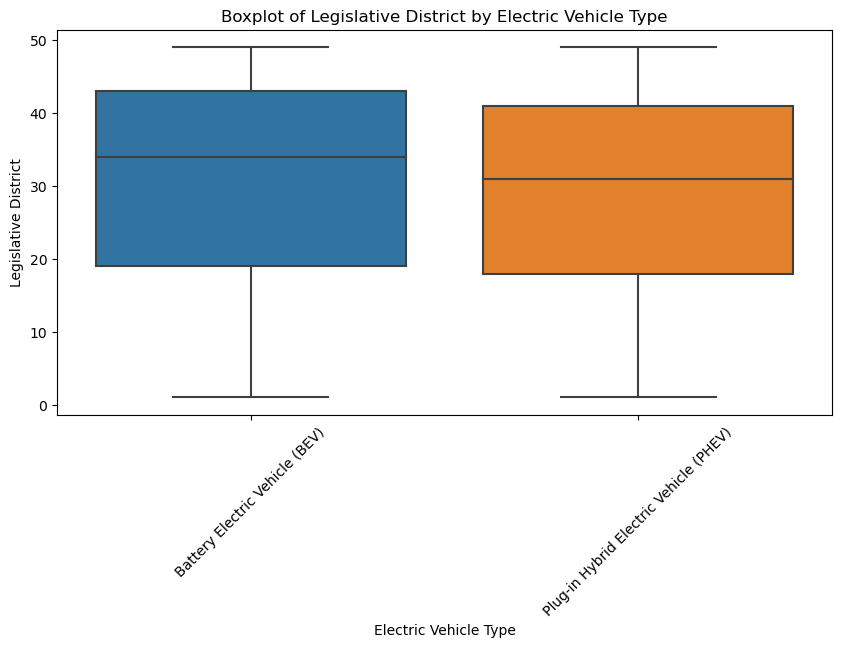

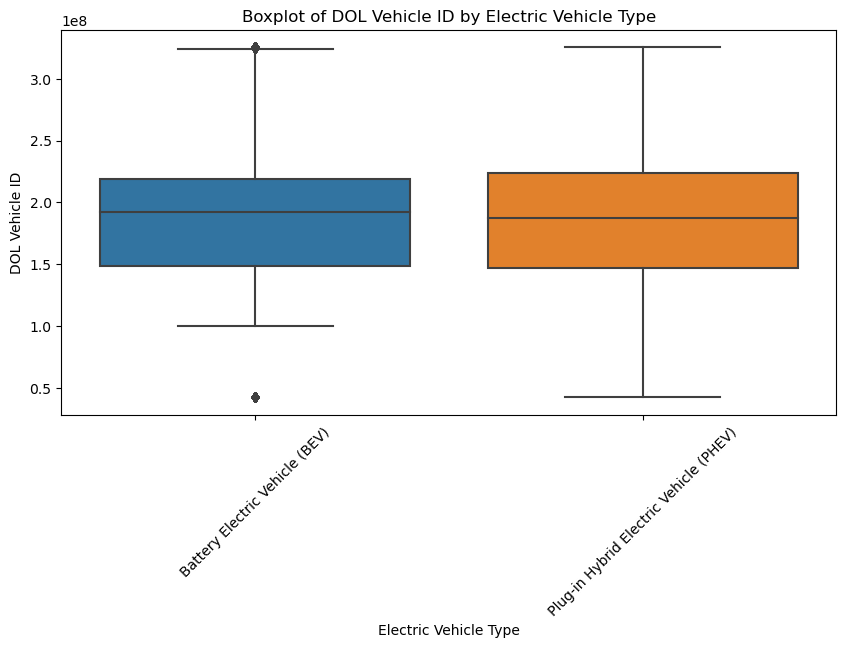

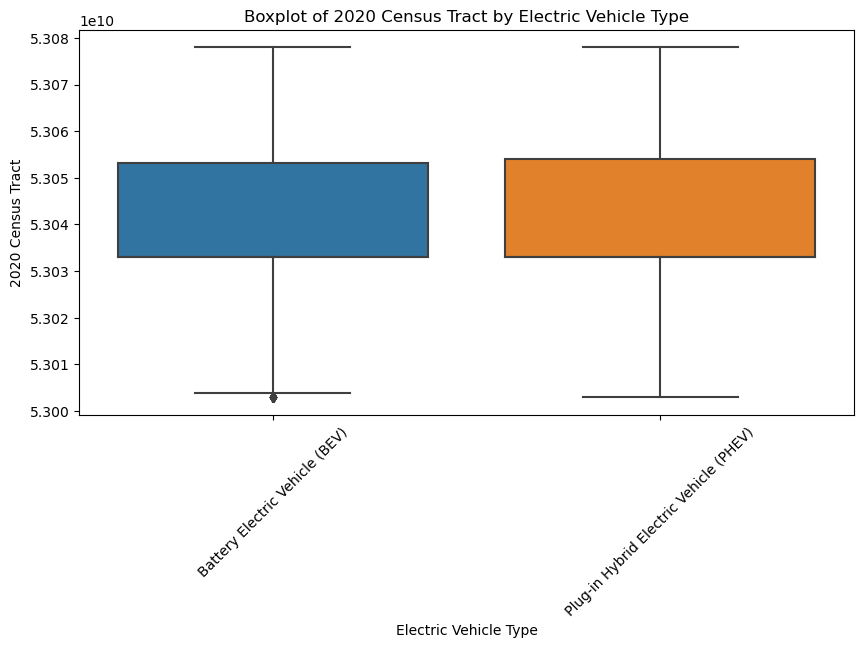

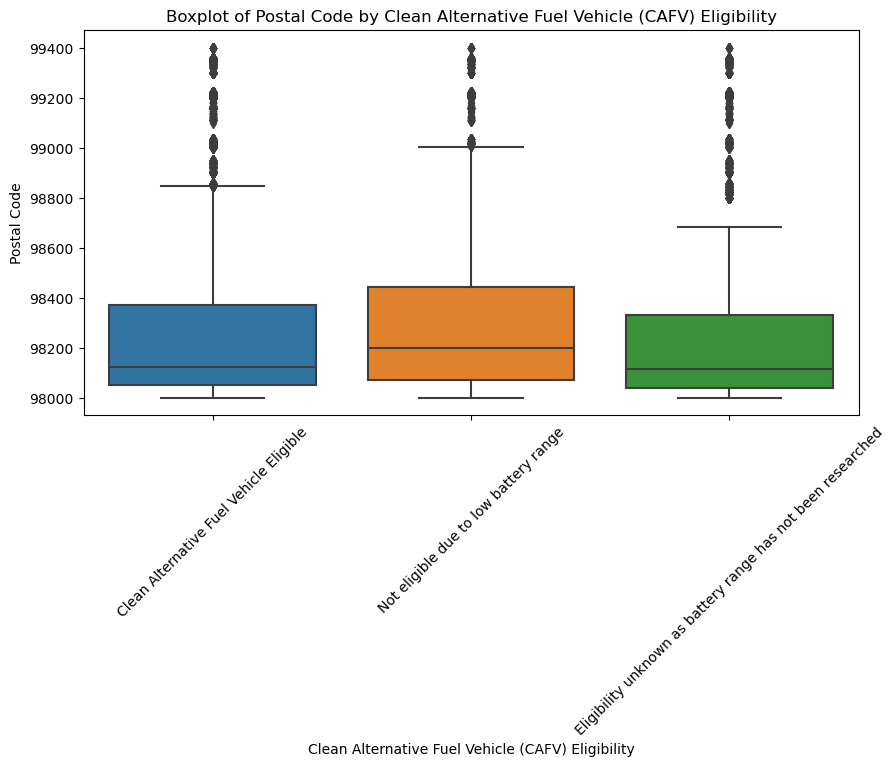

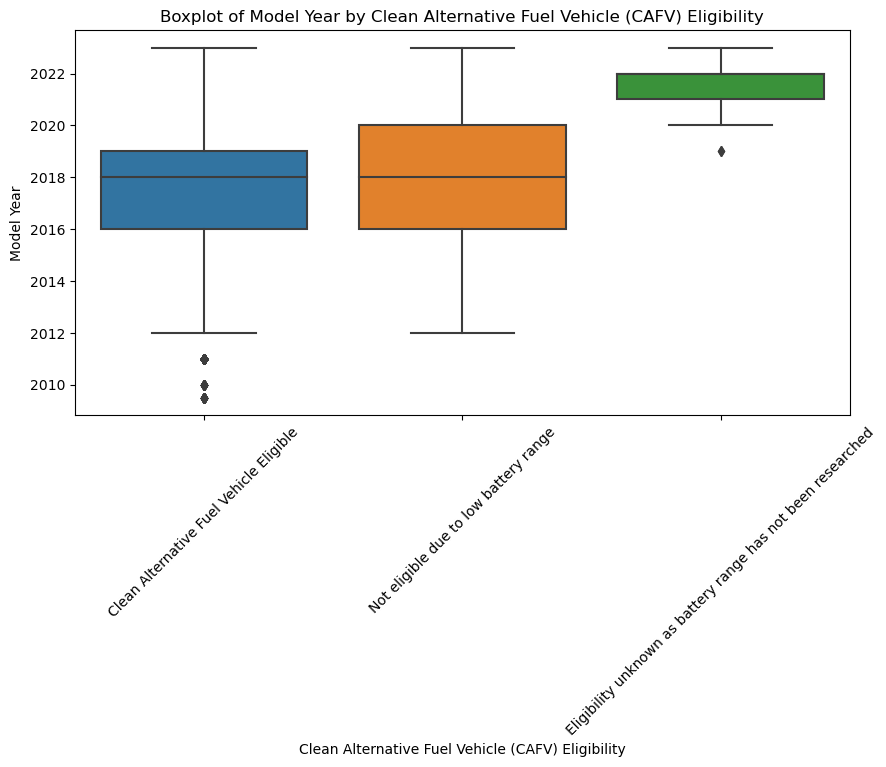

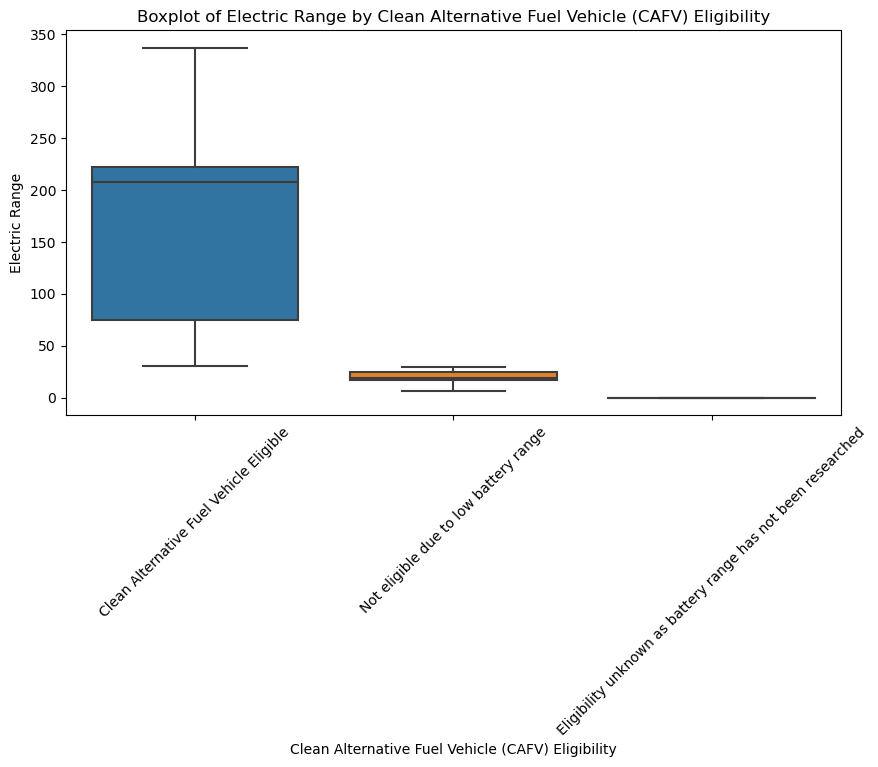

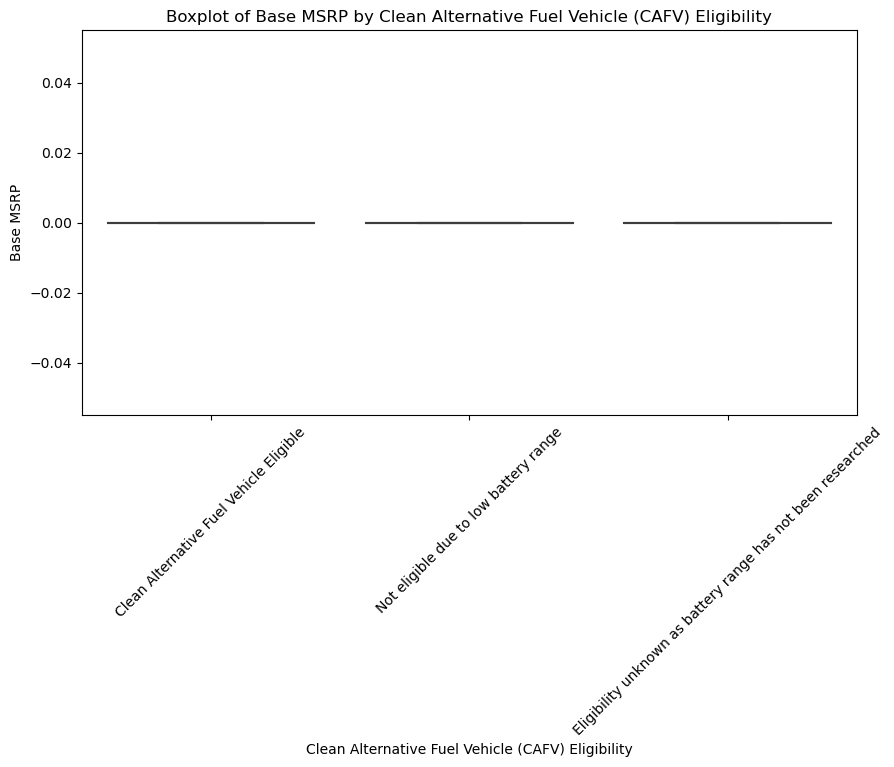

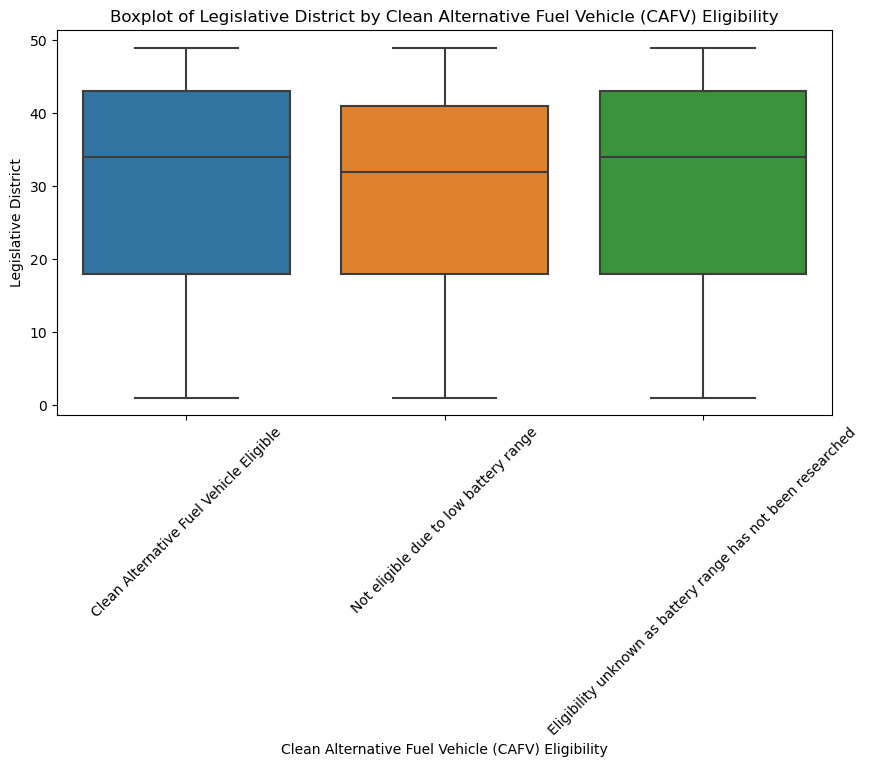

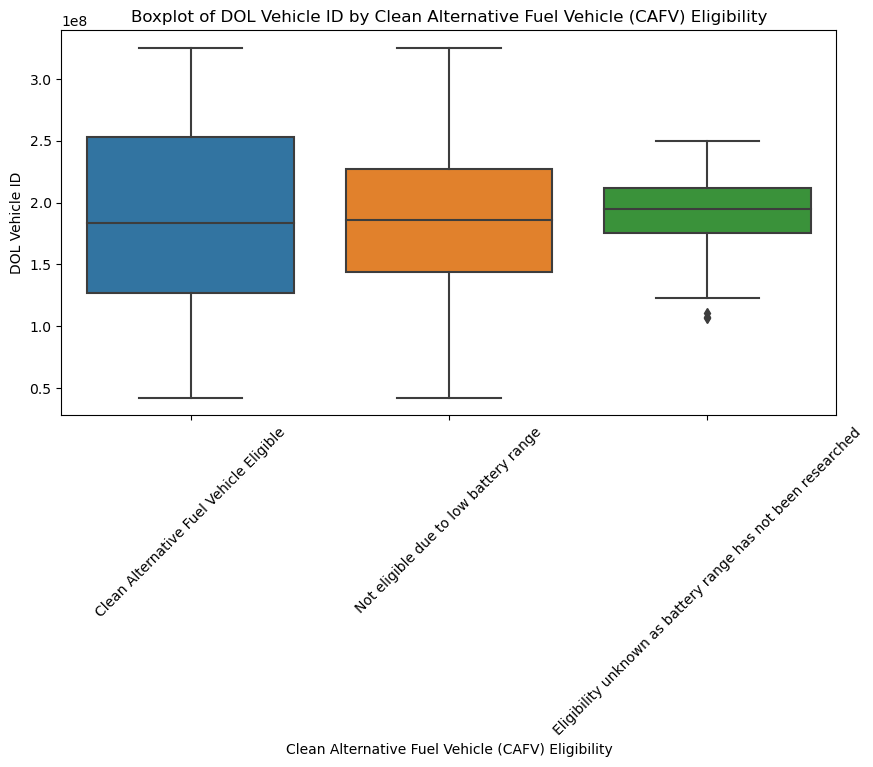

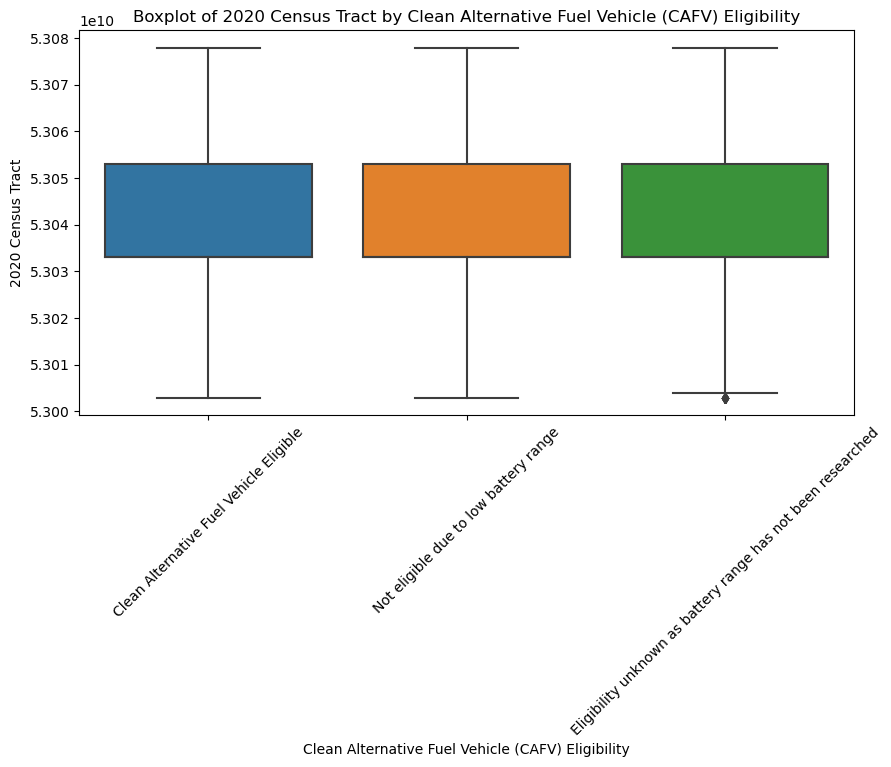

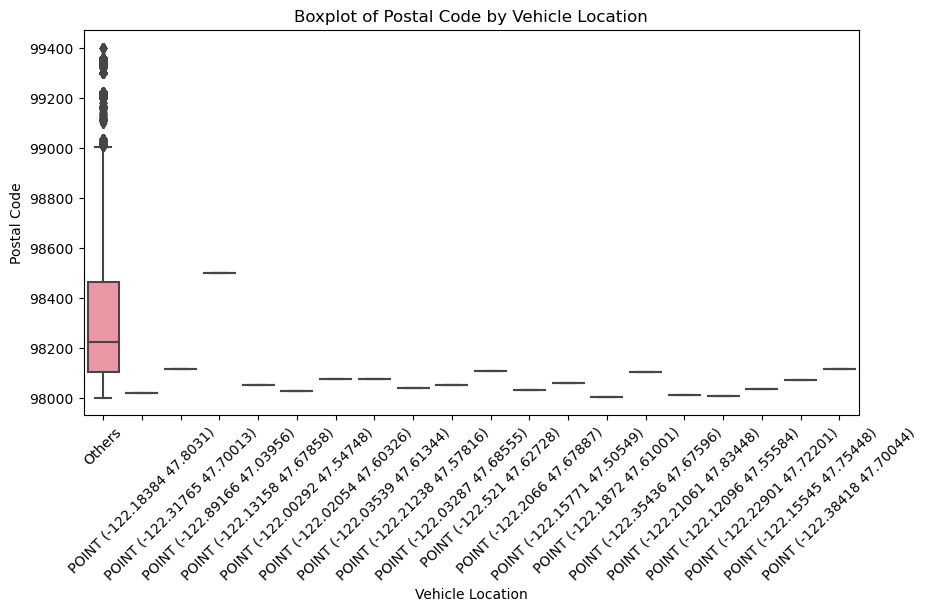

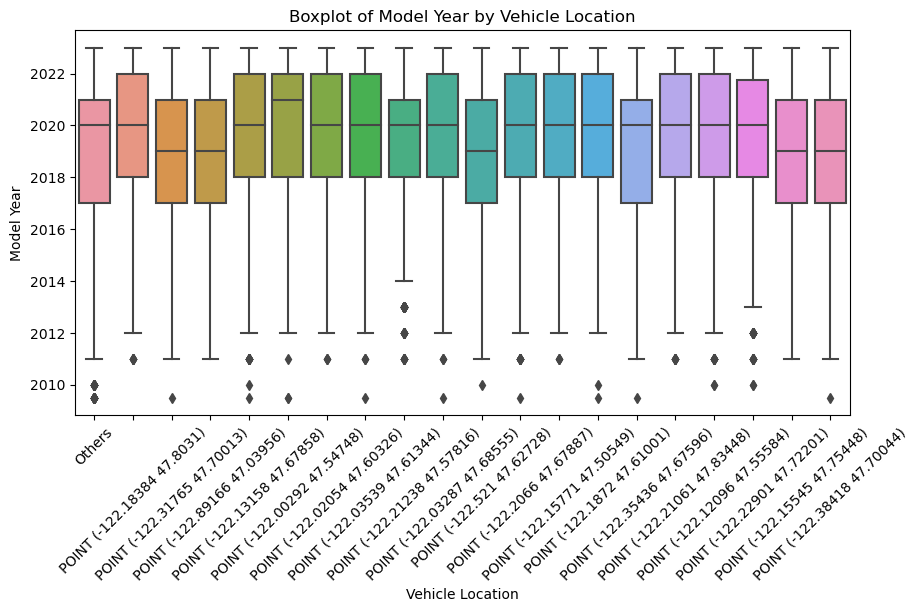

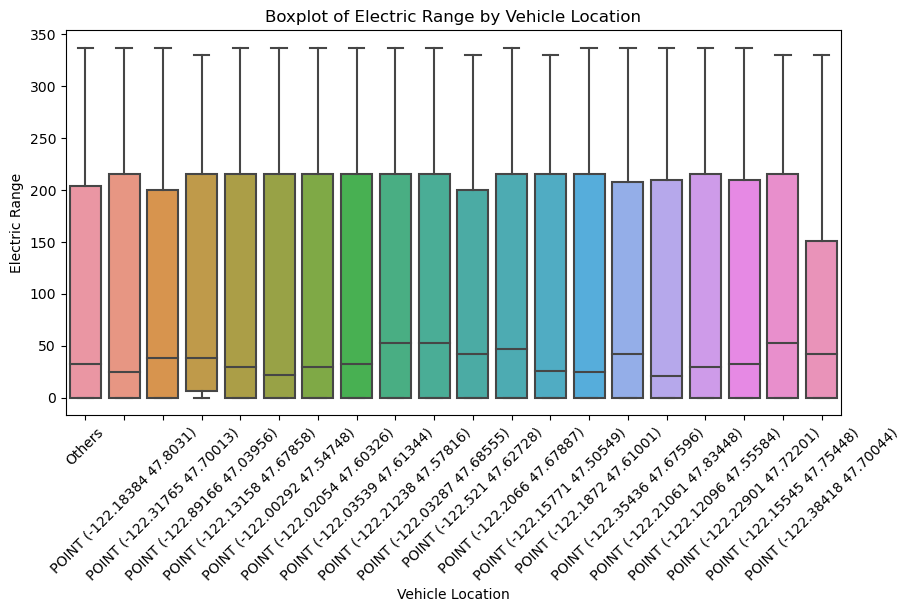

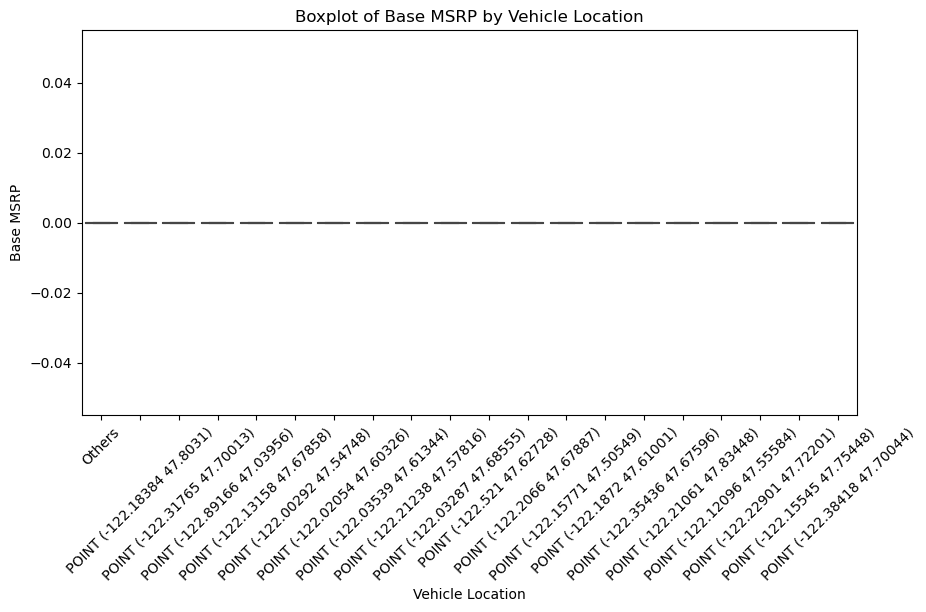

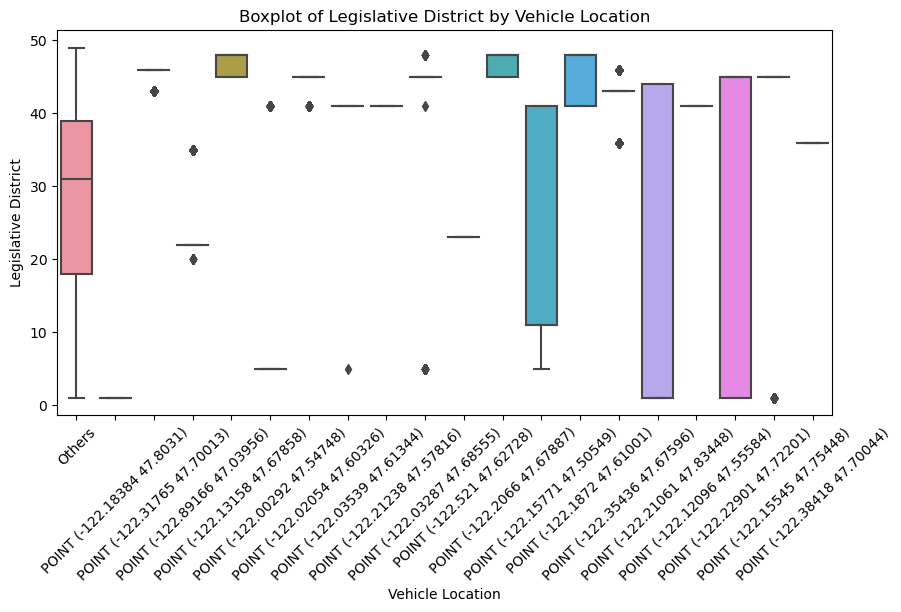

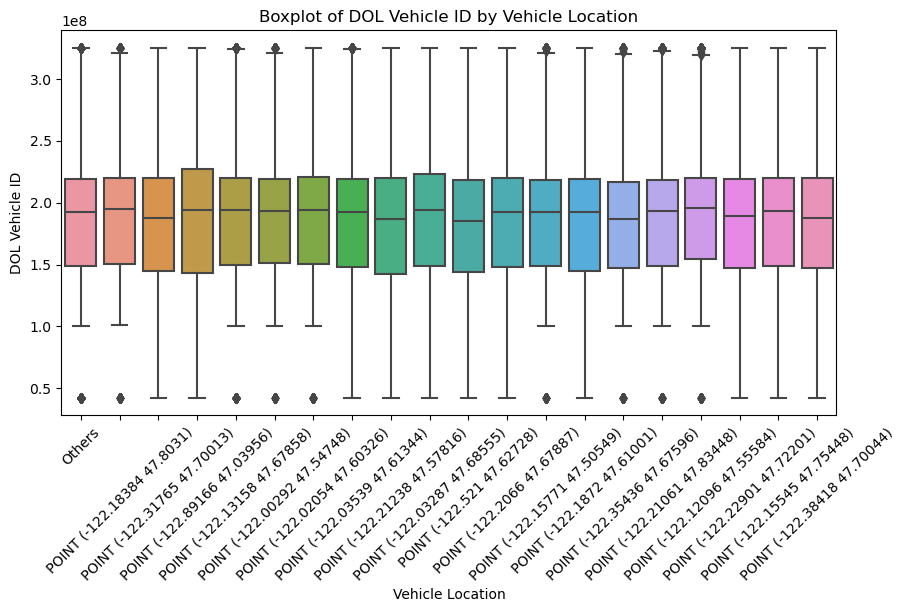

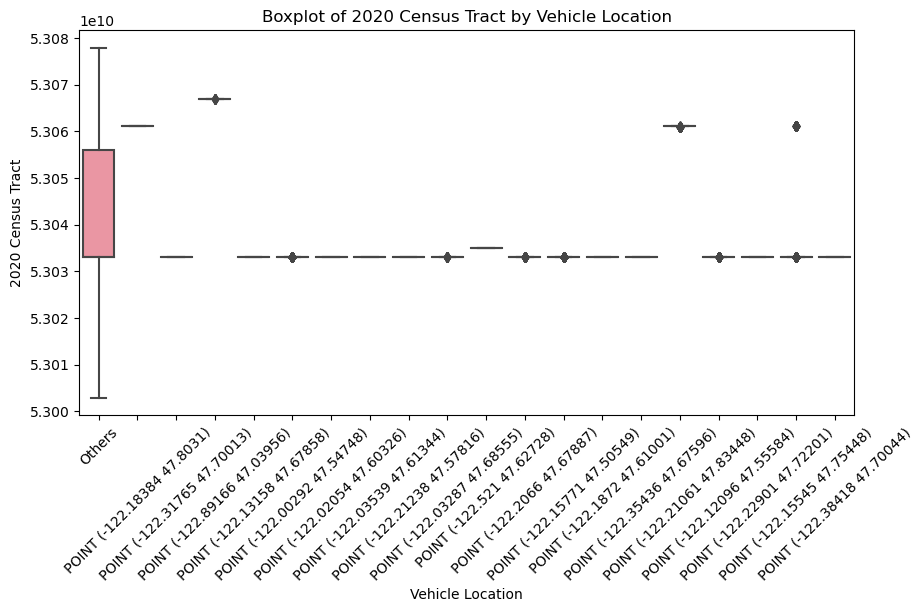

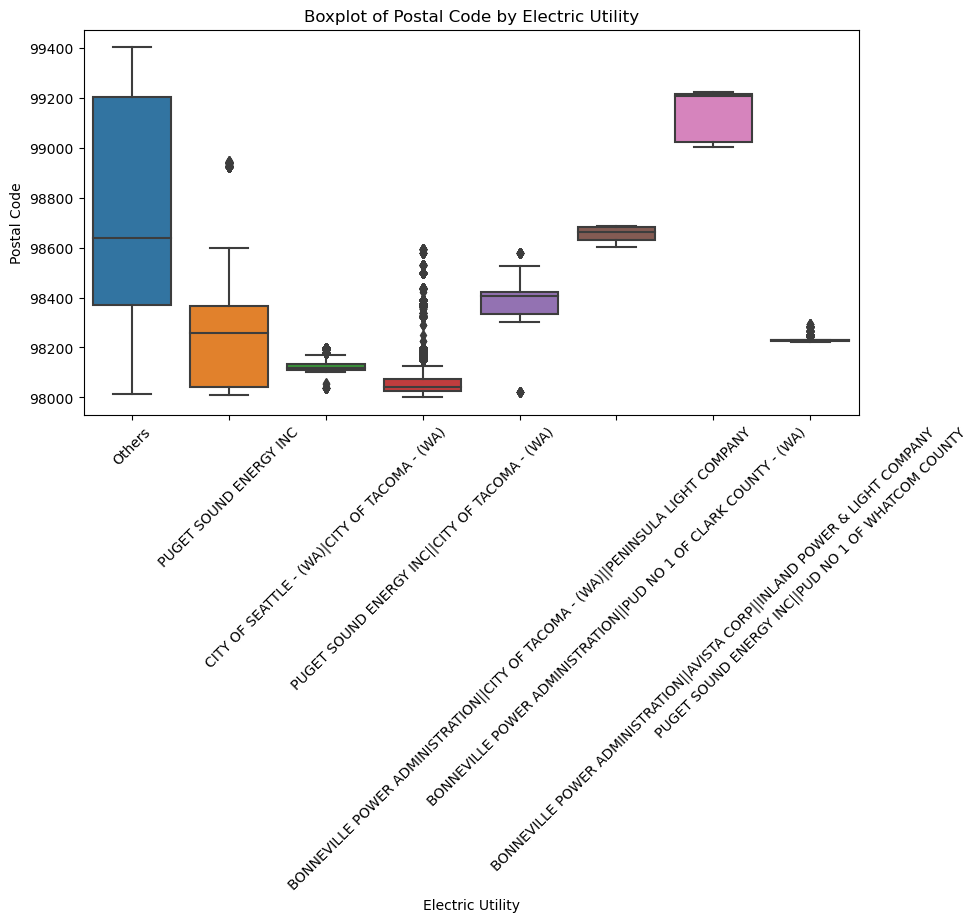

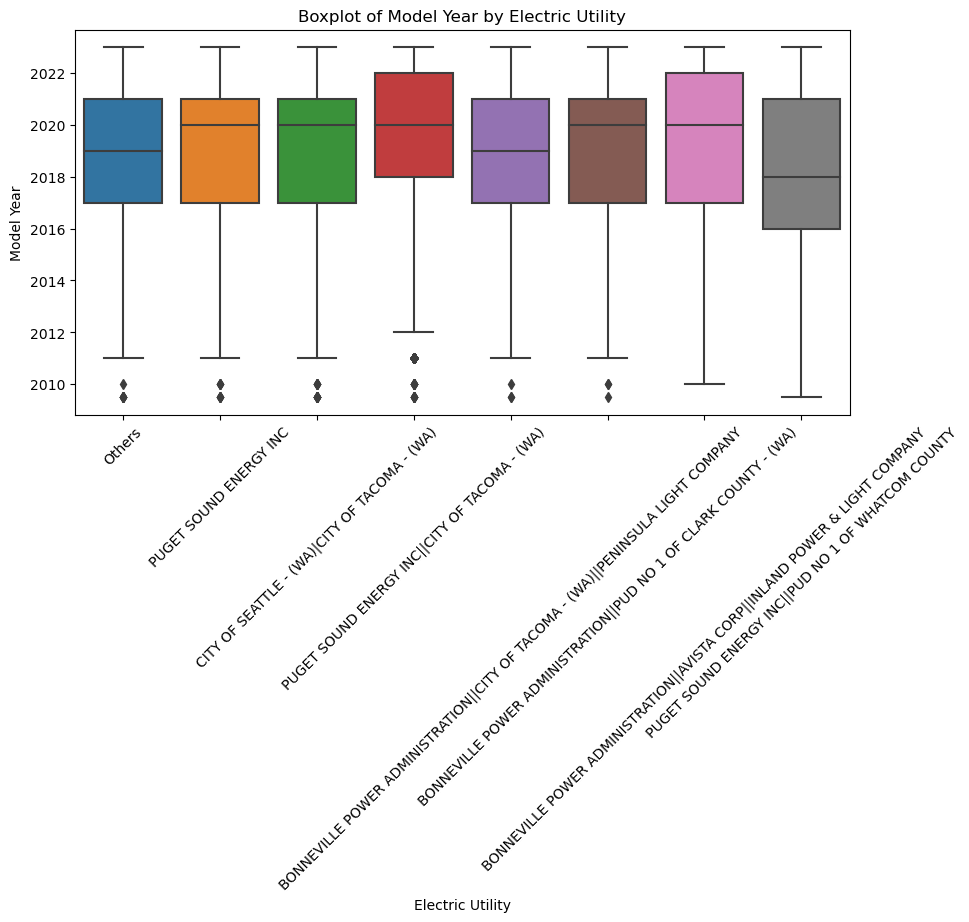

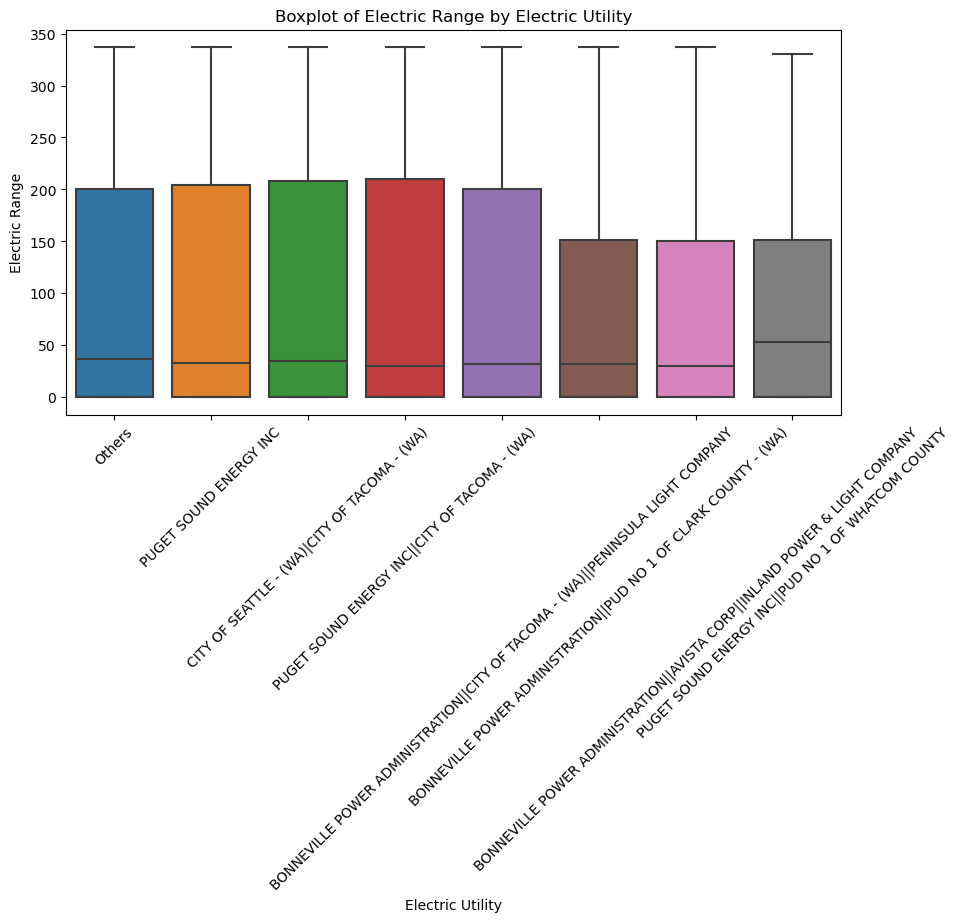

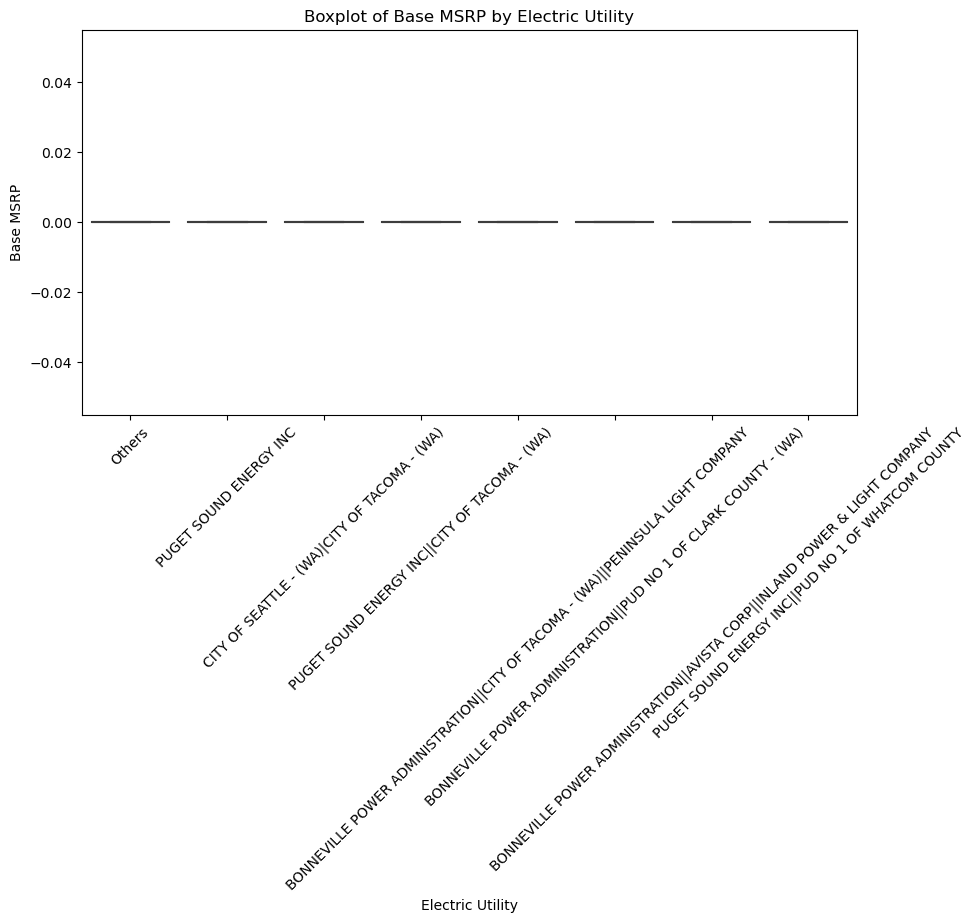

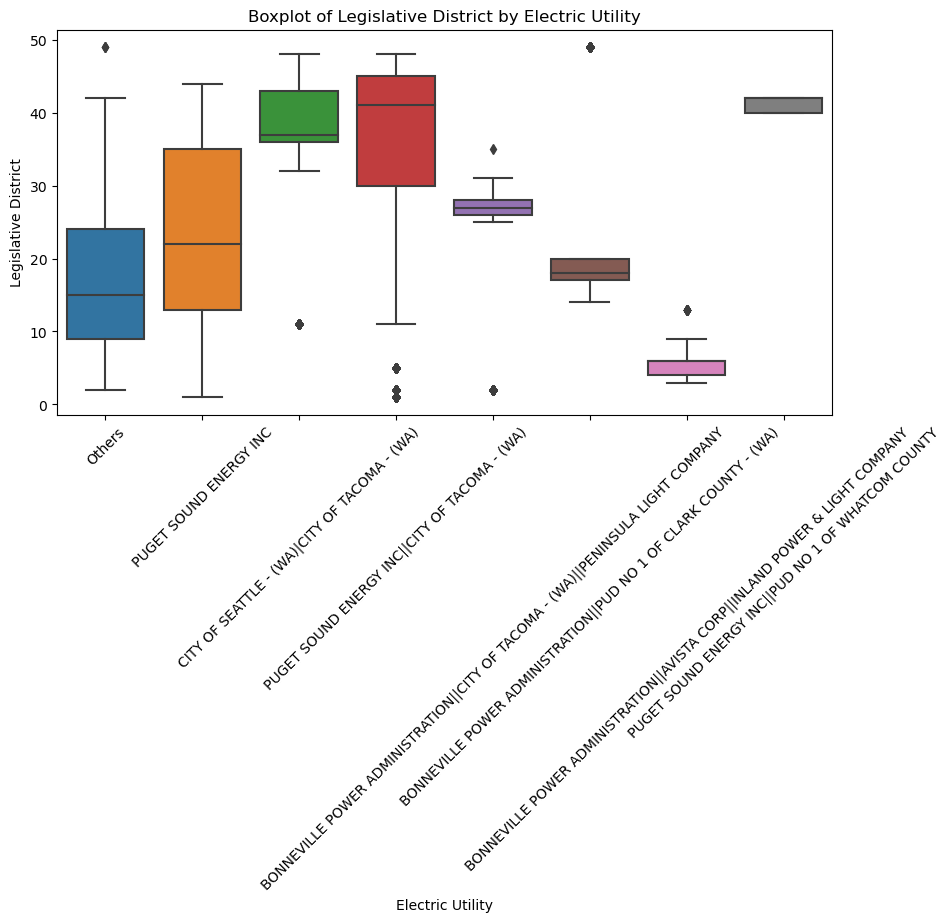

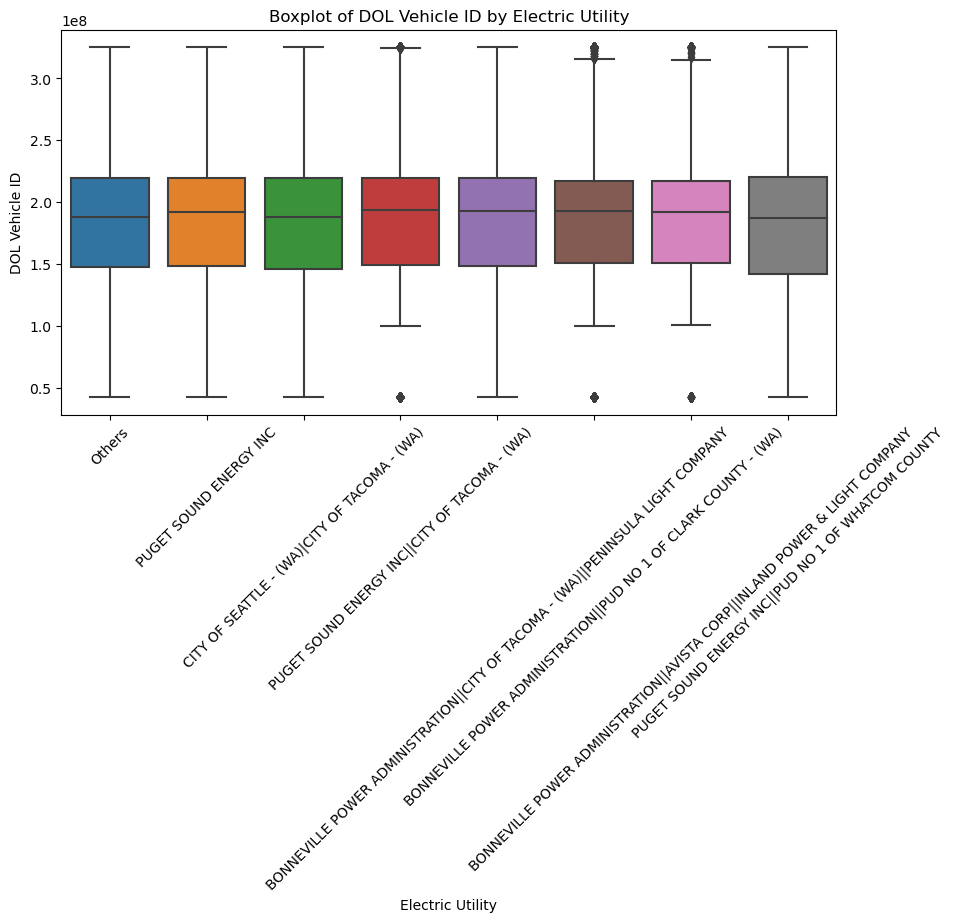

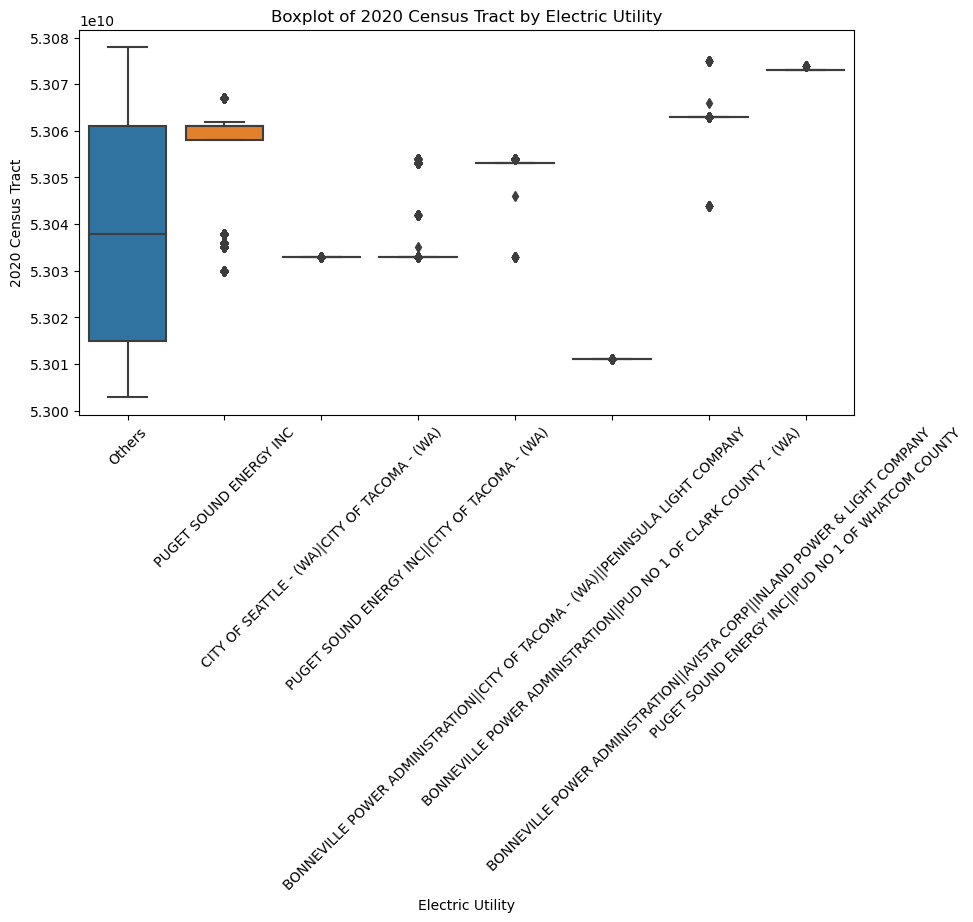

Outliers removed. Cleaned DataFrame shape: (105638, 17)


In [47]:


# Assuming df is your DataFrame and has been loaded with data
# Replace this with your actual DataFrame loading
# df = pd.read_csv('your_data.csv')

# Define numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Step 1: Pairplot for Numerical Features
sns.pairplot(df[numerical_columns])
plt.title('Pairplot of Numerical Features')
plt.show()

# Step 2: Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Boxplot for Categorical vs Numerical
for column in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column], y=df[num_col])
        plt.title(f'Boxplot of {num_col} by {column}')
        plt.xticks(rotation=45)
        plt.show()

# Step 4: Outlier Removal Logic
def remove_outliers(df, columns):
    # Calculate the Interquartile Range (IQR) for each numerical column
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Remove outliers from numerical columns
df_cleaned = remove_outliers(df.copy(), numerical_columns)
print("Outliers removed. Cleaned DataFrame shape:", df_cleaned.shape)


# Bivariate Analysis

In [ ]:
# Pairplot for numerical features
sns.pairplot(df[numerical_columns])
plt.title('Pairplot of Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot for categorical vs numerical
for column in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column], y=df[num_col])
        plt.title(f'Boxplot of {num_col} by {column}')
        plt.xticks(rotation=45)
        plt.show()


In [31]:
# Define a function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers for numerical columns
df_cleaned = remove_outliers(df, numerical_columns)

print("Shape of dataset after removing outliers:", df_cleaned.shape)


Shape of dataset after removing outliers: (88306, 17)


# Task 2: Creating a Choropleth using plotly.express to display the number of EV vehicles based on location.


In [32]:
ev_counts = df_cleaned.groupby('State').size().reset_index(name='Count')

# Step 2: Create the choropleth map
fig = px.choropleth(ev_counts,
                    geojson='https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/GeoJSON/us-states.json',
                    locations='State',  # State column
                    featureidkey='properties.name',  # This links state names to geojson data
                    color='Count',  # The counts of EVs
                    color_continuous_scale='Viridis',
                    scope='usa',  # Limit to the USA
                    labels={'Count': 'Number of EVs'},  # Label for color bar
                    title='Number of Electric Vehicles by State')

# Step 3: Update the layout and show the figure
fig.update_geos(fitbounds="locations")  # Fit the map to the data
fig.show()

In [33]:
ev_make_counts = df_cleaned.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Step 2: Create the animated racing bar plot
fig = px.bar(ev_make_counts, 
             x='Make',  # EV Make on the x-axis
             y='Count',  # Count of EVs on the y-axis
             color='Make',  # Different colors for each Make
             animation_frame='Model Year',  # Year will be used as animation frame
             range_y=[0, ev_make_counts['Count'].max()],  # Set the y-axis range
             title='Count of Electric Vehicles by Make Over the Years',
             labels={'Count': 'Number of EVs', 'Make': 'Electric Vehicle Make'},  # Labels for axes
             height=600)

# Step 3: Customize and show the figure
fig.update_layout(xaxis={'categoryorder': 'total ascending'},  # Sort bars in ascending order
                  yaxis_title='Number of EVs',
                  xaxis_title='Make')

fig.show()